In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df_original = pd.read_excel(r'C:\Users\Admin\Data Science Projects\Prototypes\openplysplice\braincube\goodyeardudelange-openplysplice_braincube_ply1_2.xlsx', dtype=str)

In [5]:
df_original.head(2)

barcode             build_dt bt_car cc_car component_name_ply1  \
0  9100421338  2024-01-04 13:06:50   BT08   CC11                 NaN   
1  9100421339  2024-01-04 13:14:53   BT10   CC03                 NaN   

  component_name_ply2 defect_type length_ply1 length_ply2 spec_name  ...  \
0                 NaN           G         NaN         NaN     JWKM1  ...   
1                 NaN           G         NaN         NaN     A2KB1  ...   

  strip_0_pulloff_speed PLY1 strip_0_pulloff_speed PLY2  \
0                        NaN                        NaN   
1                        NaN                        NaN   

  strip_0_screw_speed PLY2 strip_0_thickness PLY1 strip_0_thickness PLY2  \
0                      NaN                    NaN                    NaN   
1                      NaN                    NaN                    NaN   

  strip_0_width PLY1 strip_0_width PLY2 TEAM_BUILD width PLY 1 width PLY 2  
0                NaN                NaN          A         NaN         NaN  
1                NaN                NaN          A         NaN         NaN  

[2 rows x 63 columns]

In [6]:
df = df_original.copy()

In [7]:
df.head(5)

barcode             build_dt bt_car cc_car component_name_ply1  \
0  9100421338  2024-01-04 13:06:50   BT08   CC11                 NaN   
1  9100421339  2024-01-04 13:14:53   BT10   CC03                 NaN   
2  9100421340  2024-01-04 13:20:36   BT09   CC07                 NaN   
3  9100421341  2024-01-04 13:31:19   BT10   CC11               PLY 1   
4  9100421342  2024-01-04 13:33:15   BT01   CC03               PLY 1   

  component_name_ply2 defect_type length_ply1 length_ply2 spec_name  ...  \
0                 NaN           G         NaN         NaN     JWKM1  ...   
1                 NaN           G         NaN         NaN     A2KB1  ...   
2                 NaN           G         NaN         NaN     A2KB1  ...   
3                 NaN           G   1391.4924         NaN     JWKM1  ...   
4                 NaN           G   1468.3315         NaN     BTJN1  ...   

  strip_0_pulloff_speed PLY1 strip_0_pulloff_speed PLY2  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                     3.6099                        NaN   
4                     2.0074                        NaN   

  strip_0_screw_speed PLY2 strip_0_thickness PLY1 strip_0_thickness PLY2  \
0                      NaN                    NaN                    NaN   
1                      NaN                    NaN                    NaN   
2                      NaN                    NaN                    NaN   
3                      NaN                 1.4552                    NaN   
4                      NaN                 1.4519                    NaN   

  strip_0_width PLY1 strip_0_width PLY2 TEAM_BUILD width PLY 1 width PLY 2  
0                NaN                NaN          A         NaN         NaN  
1                NaN                NaN          A         NaN         NaN  
2                NaN                NaN          A         NaN         NaN  
3            81.3986                NaN          A         596         NaN  
4            81.2906                NaN          A         516         NaN  

[5 rows x 63 columns]

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df.head(10)

barcode             build_dt bt_car cc_car component_name_ply1  \
0  9100421338  2024-01-04 13:06:50   BT08   CC11                 NaN   
1  9100421339  2024-01-04 13:14:53   BT10   CC03                 NaN   
2  9100421340  2024-01-04 13:20:36   BT09   CC07                 NaN   
3  9100421341  2024-01-04 13:31:19   BT10   CC11               PLY 1   
4  9100421342  2024-01-04 13:33:15   BT01   CC03               PLY 1   
5  9100421343  2024-01-04 13:36:04   BT05   CC09                 NaN   
6  9100421344  2024-01-04 13:39:47   BT09   CC10               PLY 1   
7  9100421345  2024-01-04 13:40:26   BT02   CC07               PLY 1   
8  9100421346  2024-01-04 13:48:46   BT03   CC05                 NaN   
9  9100421347  2024-01-04 13:49:17   BT04   CC08                 NaN   

  component_name_ply2 defect_type length_ply1 length_ply2 spec_name revision  \
0                 NaN           G         NaN         NaN     JWKM1    P0001   
1                 NaN           G         NaN         NaN     A2KB1    D0053   
2                 NaN           G         NaN         NaN     A2KB1    D0053   
3                 NaN           G   1391.4924         NaN     JWKM1    P0001   
4                 NaN           G   1468.3315         NaN     BTJN1    P0002   
5                 NaN           G         NaN         NaN     JWKM1    P0001   
6                 NaN           G   1469.8181         NaN     BTJN1    P0002   
7                 NaN           G   1463.8923         NaN     A2KB1    D0053   
8                 NaN           G         NaN         NaN     9AJU1    P0002   
9                 NaN           G         NaN         NaN     9AJU1    P0002   

  dimensions size quality_rate         defect_name spec_angle_ply1  \
0     245/50   18          100  TREAD NOT FINISHED             NaN   
1     245/45   19          100  TREAD NOT FINISHED             NaN   
2     245/45   19          100          LINER HOLE             NaN   
3     245/50   18          100  TREAD NOT FINISHED              90   
4     285/30   19          100      MACHINE DEFECT              90   
5     245/50   18          100      MACHINE DEFECT             NaN   
6     285/30   19          100    DAMAGED SIDEWALL              90   
7     245/45   19          100    DAMAGED SIDEWALL              90   
8     235/45   20          100    DAMAGED SIDEWALL             NaN   
9     235/45   20          100    DAMAGED SIDEWALL             NaN   

  spec_angle_ply2 spec_length_ply1 spec_length_ply2 strip_10_gp_speed PLY1  \
0             NaN              NaN              NaN                    NaN   
1             NaN              NaN              NaN                    NaN   
2             NaN              NaN              NaN                    NaN   
3             NaN              NaN              NaN                 8.2142   
4             NaN              NaN              NaN                 3.1427   
5             NaN              NaN              NaN                    NaN   
6             NaN              NaN              NaN                      0   
7             NaN              NaN              NaN                      0   
8             NaN              NaN              NaN                    NaN   
9             NaN              NaN              NaN                    NaN   

  strip_10_gp_speed PLY2 strip_10_p1 PLY1 strip_10_p1 PLY2 strip_10_p2 PLY1  \
0                    NaN              NaN              NaN              NaN   
1                    NaN              NaN              NaN              NaN   
2                    NaN              NaN              NaN              NaN   
3                    NaN             87.1              NaN            138.6   
4                    NaN            79.35              NaN           102.41   
5                    NaN              NaN              NaN              NaN   
6                    NaN                0              NaN                0   
7                    NaN                0              NaN            

In [10]:
df['build_dt']= pd.to_datetime(df['build_dt'])

In [12]:
df.shape

(331039, 63)

In [456]:
df = df[~((df['component_name_ply1'].isna() | df['component_name_ply1'].eq('')) &
          (df['component_name_ply2'].isna() | df['component_name_ply2'].eq('')))]

In [458]:
df = df[(df['build_dt'] >= '2024-10-01') & (df['build_dt'] <= '2025-04-01')]

In [13]:
df = df[df['defect_type'] != 'C']

In [14]:
df.shape

(254367, 63)

In [15]:
df.to_csv('complete_dates.csv', index=False)

In [537]:
df = pd.read_csv('complete_dates.csv')

In [16]:
df.columns

Index(['barcode', 'build_dt', 'bt_car', 'cc_car', 'component_name_ply1',
       'component_name_ply2', 'defect_type', 'length_ply1', 'length_ply2',
       'spec_name', 'revision', 'dimensions', 'size', 'quality_rate',
       'defect_name', 'spec_angle_ply1', 'spec_angle_ply2', 'spec_length_ply1',
       'spec_length_ply2', 'strip_10_gp_speed PLY1', 'strip_10_gp_speed PLY2',
       'strip_10_p1 PLY1', 'strip_10_p1 PLY2', 'strip_10_p2 PLY1',
       'strip_10_p2 PLY2', 'strip_10_pulloff_speed PLY1',
       'strip_10_pulloff_speed PLY2', 'strip_10_screw_speed PLY1',
       'strip_10_screw_speed PLY2', 'strip_10_thickness PLY1',
       'strip_10_thickness PLY2', 'strip_10_width PLY1', 'strip_10_width PLY2',
       'strip_18_gp_speed PLY1', 'strip_18_gp_speed PLY2', 'strip_18_p1 PLY1',
       'strip_18_p1 PLY2', 'strip_18_p2 PLY1', 'strip_18_p2 PLY2',
       'strip_18_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY2',
       'strip_18_screw_speed PLY1', 'strip_18_screw_speed PLY2',
       '

In [17]:
df = df[[#'barcode', 
    'build_dt', #'bt_car',
    'cc_car', 'component_name_ply1',
       'component_name_ply2', 'defect_type', 'length_ply1', 'length_ply2',
       'spec_name', 
#'revision', 'dimensions', 
    'size', 'quality_rate',
       'defect_name', 'spec_angle_ply1', 'spec_angle_ply2', 'spec_length_ply1',
       'spec_length_ply2', 'strip_10_gp_speed PLY1', 'strip_10_gp_speed PLY2',
       'strip_10_p1 PLY1', 'strip_10_p1 PLY2', 'strip_10_p2 PLY1',
       'strip_10_p2 PLY2', 'strip_10_pulloff_speed PLY1',
       'strip_10_pulloff_speed PLY2', 'strip_10_screw_speed PLY1',
       'strip_10_screw_speed PLY2', 'strip_10_thickness PLY1',
       'strip_10_thickness PLY2', 'strip_10_width PLY1', 'strip_10_width PLY2',
       'strip_18_gp_speed PLY1', 'strip_18_gp_speed PLY2', 'strip_18_p1 PLY1',
       'strip_18_p1 PLY2', 'strip_18_p2 PLY1', 'strip_18_p2 PLY2',
       'strip_18_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY2',
       'strip_18_screw_speed PLY1', 'strip_18_screw_speed PLY2',
       'strip_18_thickness PLY1', 'strip_18_thickness PLY2',
       'strip_18_width PLY1', 'strip_18_width PLY2', 'strip_0_gp_speed PLY1',
       'strip_0_gp_speed PLY2', 'strip_0_p1 PLY1', 'strip_0_p1 PLY2',
       'strip_0_p2 PLY1', 'strip_0_p2 PLY2', 'strip_0_pulloff_speed PLY1',
       'strip_0_pulloff_speed PLY2', 'strip_0_screw_speed PLY2',
       'strip_0_thickness PLY1', 'strip_0_thickness PLY2',
       'strip_0_width PLY1', 'strip_0_width PLY2', 'TEAM_BUILD', 'width PLY 1',
       'width PLY 2']].copy()

In [544]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'strip_10_gp_speed PLY1',
       'strip_10_gp_speed PLY2', 'strip_10_p1 PLY1', 'strip_10_p1 PLY2',
       'strip_10_p2 PLY1', 'strip_10_p2 PLY2', 'strip_10_pulloff_speed PLY1',
       'strip_10_pulloff_speed PLY2', 'strip_10_screw_speed PLY1',
       'strip_10_screw_speed PLY2', 'strip_10_thickness PLY1',
       'strip_10_thickness PLY2', 'strip_10_width PLY1', 'strip_10_width PLY2',
       'strip_18_gp_speed PLY1', 'strip_18_gp_speed PLY2', 'strip_18_p1 PLY1',
       'strip_18_p1 PLY2', 'strip_18_p2 PLY1', 'strip_18_p2 PLY2',
       'strip_18_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY2',
       'strip_18_screw_speed PLY1', 'strip_18_screw_speed PLY2',
       'strip_18_thickness PLY1', 'strip_18_thickness PLY2',
 

In [18]:
df = df[df['defect_name'].isna() | (df['defect_name'].str.strip().str.lower() == 'open ply splice')]

In [19]:
df.shape

(238956, 59)

In [21]:
exclude = ['build_dt', 'bt_car', 'cc_car', 'component_name_ply1','component_name_ply2', 'defect_type','spec_name', 'revision','defect_name','TEAM_BUILD']

In [22]:
for col in df.columns:
    if col not in exclude and df[col].dtype=='object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [952]:
for col in df2.columns:
    if col not in exclude and df2[col].dtype=='object':
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [953]:
df2[['build_dt']].head()

build_dt
0 2024-01-04 13:06:50
1 2024-01-04 13:14:53
2 2024-01-04 13:20:36
3 2024-01-04 13:31:19
4 2024-01-04 13:33:15

In [23]:
df.describe().T

count                           mean  \
build_dt                       238956  2024-09-07 16:53:17.263170048   
length_ply1                  232493.0                     1513.91283   
length_ply2                   76988.0                    1508.566063   
size                         238275.0                      19.524986   
quality_rate                 238938.0                       0.885585   
spec_angle_ply1              232493.0                      88.343985   
spec_angle_ply2               76988.0                      92.000572   
spec_length_ply1               7606.0                    1630.055745   
spec_length_ply2               3227.0                    1634.235823   
strip_10_gp_speed PLY1       232493.0                      17.610149   
strip_10_gp_speed PLY2        76988.0                       8.156508   
strip_10_p1 PLY1             232493.0                      84.511059   
strip_10_p1 PLY2              76988.0                      83.916397   
strip_10_p2 PLY1             232493.0                     181.718734   
strip_10_p2 PLY2              76988.0                     198.606381   
strip_10_pulloff_speed PLY1  232493.0                      11.043167   
strip_10_pulloff_speed PLY2   76988.0                       6.034865   
strip_10_screw_speed PLY1    232493.0                      25.044427   
strip_10_screw_speed PLY2     76988.0                      11.820165   
strip_10_thickness PLY1      232493.0                       1.359109   
strip_10_thickness PLY2       76988.0                       1.159852   
strip_10_width PLY1          232493.0                      78.468037   
strip_10_width PLY2           76988.0                      78.059991   
strip_18_gp_speed PLY1       232493.0                      13.474555   
strip_18_gp_speed PLY2        76988.0                       6.035266   
strip_18_p1 PLY1             232493.0                      64.894142   
strip_18_p1 PLY2              76988.0                      62.202458   
strip_18_p2 PLY1             232493.0                     140.665477   
strip_18_p2 PLY2              76988.0                      147.33846   
strip_18_pulloff_speed PLY1  232493.0                       8.443527   
strip_18_pulloff_speed PLY2   76988.0                       4.465496   
strip_18_screw_speed PLY1    232493.0                      19.160433   
strip_18_screw_speed PLY2     76988.0                       8.713756   
strip_18_thickness PLY1      232493.0                       1.039894   
strip_18_thickness PLY2       76988.0                       0.865373   
strip_18_width PLY1          232493.0                      60.093437   
strip_18_width PLY2           76988.0                      58.304177   
strip_0_gp_speed PLY1        232493.0                      17.598688   
strip_0_gp_speed PLY2         76988.0                       8.140483   
strip_0_p1 PLY1              232493.0                      84.506614   
strip_0_p1 PLY2               76988.0                      83.938553   
strip_0_p2 PLY1              232493.0                       181.7501   
strip_0_p2 PLY2               76988.0                     198.572927   
strip_0_pulloff_speed PLY1   232493.0                      11.035624   
strip_0_pulloff_speed PLY2    76988.0                       6.022282   
strip_0_screw_speed PLY2      76988.0                      11.795814   
strip_0_thickness PLY1       232493.0                       1.359243   
strip_0_thickness PLY2        76988.0                       1.159989   
strip_0_width PLY1           232493.0                       78.47076   
strip_0_width PLY2            76988.0                      78.060498   
width PLY 1                  232493.0                      569.47524   
width PLY 2                   76988.0                     519.667922   

                                             min  \
build_dt                     2024-01-04 22:27:43   
length_ply1                            1364.0881   
length_ply2                            1387.6484   
size   

In [24]:
df.isnull().sum()

build_dt                            0
cc_car                             80
component_name_ply1              6463
component_name_ply2            161968
defect_type                    236840
length_ply1                      6463
length_ply2                    161968
spec_name                         681
size                              681
quality_rate                       18
defect_name                    236840
spec_angle_ply1                  6463
spec_angle_ply2                161968
spec_length_ply1               231350
spec_length_ply2               235729
strip_10_gp_speed PLY1           6463
strip_10_gp_speed PLY2         161968
strip_10_p1 PLY1                 6463
strip_10_p1 PLY2               161968
strip_10_p2 PLY1                 6463
strip_10_p2 PLY2               161968
strip_10_pulloff_speed PLY1      6463
strip_10_pulloff_speed PLY2    161968
strip_10_screw_speed PLY1        6463
strip_10_screw_speed PLY2      161968
strip_10_thickness PLY1          6463
strip_10_thi

In [335]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'strip_10_gp_speed PLY1',
       'strip_10_gp_speed PLY2', 'strip_10_p1 PLY1', 'strip_10_p1 PLY2',
       'strip_10_p2 PLY1', 'strip_10_p2 PLY2', 'strip_10_pulloff_speed PLY1',
       'strip_10_pulloff_speed PLY2', 'strip_10_screw_speed PLY1',
       'strip_10_screw_speed PLY2', 'strip_10_thickness PLY1',
       'strip_10_thickness PLY2', 'strip_10_width PLY1', 'strip_10_width PLY2',
       'strip_18_gp_speed PLY1', 'strip_18_gp_speed PLY2', 'strip_18_p1 PLY1',
       'strip_18_p1 PLY2', 'strip_18_p2 PLY1', 'strip_18_p2 PLY2',
       'strip_18_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY2',
       'strip_18_screw_speed PLY1', 'strip_18_screw_speed PLY2',
       'strip_18_thickness PLY1', 'strip_18_thickness PLY2',
 

In [25]:
df['defect_type_binary'] = df['defect_type'].apply(lambda x: 1 if str(x).strip().upper() == 'G' else 0)

In [558]:
df.head()

build_dt cc_car component_name_ply1 component_name_ply2  \
0  2024-10-01 00:00:18   CC05               PLY 1               PLY 2   
1  2024-10-01 00:00:47   CC08               PLY 1                 NaN   
2  2024-10-01 00:02:09   CC06               PLY 1               PLY 2   
3  2024-10-01 00:02:49   CC03               PLY 1               PLY 2   
4  2024-10-01 00:03:24   CC02               PLY 1               PLY 2   

  defect_type  length_ply1  length_ply2 spec_name  size  quality_rate  \
0         NaN    1393.6523    1407.1372     E2KY1  18.0             0   
1         NaN    1473.4756          NaN     2VLA1  19.0             0   
2         NaN    1466.3636    1473.6514     P6LC1  19.0             0   
3         NaN    1384.3550    1397.4432     80KU1  18.0             0   
4         NaN    1467.3446    1476.7402     LHLM1  19.0             0   

  defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
0         NaN             88.0             92.0               NaN   
1         NaN             86.0              NaN               NaN   
2         NaN             88.0             92.0               NaN   
3         NaN             88.0             92.0               NaN   
4         NaN             88.0             92.0               NaN   

   spec_length_ply2  strip_10_gp_speed PLY1  strip_10_gp_speed PLY2  \
0               NaN                 25.3492                 13.7879   
1               NaN                 25.4447                     NaN   
2               NaN                 25.4482                 11.2983   
3               NaN                 25.4469                 15.8286   
4               NaN                 25.4457                 10.4171   

   strip_10_p1 PLY1  strip_10_p1 PLY2  strip_10_p2 PLY1  strip_10_p2 PLY2  \
0            121.80             85.30            189.77            186.41   
1            119.65               NaN            187.67               NaN   
2            120.65             85.30            187.32            172.97   
3            118.85             74.55            182.56            191.52   
4            119.40             75.90            182.14            166.25   

   strip_10_pulloff_speed PLY1  strip_10_pulloff_speed PLY2  \
0                      15.9383                      10.1984   
1                      16.0003                          NaN   
2                      15.9984                       8.3586   
3                      15.9994                      11.7080   
4                      15.9992                       7.7054   

   strip_10_screw_speed PLY1  strip_10_screw_speed PLY2  \
0                    46.0010                    19.1104   
1                    46.2188                        NaN   
2                    47.3474                    15.0619   
3                    46.3694                    21.8945   
4                    46.4842                    13.5334   

   strip_10_thickness PLY1  strip_10_thickness PLY2  strip_10_width PLY1  \
0                   1.4326                   1.2328              81.6975   
1                   1.4369                      NaN              81.6899   
2                   1.4303                   1.2387              81.6828   
3                   1.4327                   1.2304              81.6694   
4                   1.4361                   1.2353              81.6800   

   strip_10_width PLY2  strip_18_gp_speed PLY1  strip_18_gp_speed PLY2  \
0              81.3128                  0.0000                  0.0000   
1                  NaN                 25.4471                     NaN   
2              81.1975                 25.4463                 14.0163   
3              81.3382                  0.0000                  0.0000   
4              81.1739                 25.4455                 10.1467   

   strip_18_p1 PLY1  strip_18_p1 PLY2  strip_18_p2 PLY1  strip_18_p2 PLY2  \
0              0.00              0.00              0.00              0.00   
1            113.10               NaN    

In [26]:
df['component_name_ply1_binary'] = df['component_name_ply1'].apply(lambda x: 1 if str(x).strip().lower() == 'ply 1' else 0)
df['component_name_ply2_binary'] = df['component_name_ply2'].apply(lambda x: 1 if str(x).strip().lower() == 'ply 2' else 0)

In [562]:
df.head()

build_dt cc_car component_name_ply1 component_name_ply2  \
0  2024-10-01 00:00:18   CC05               PLY 1               PLY 2   
1  2024-10-01 00:00:47   CC08               PLY 1                 NaN   
2  2024-10-01 00:02:09   CC06               PLY 1               PLY 2   
3  2024-10-01 00:02:49   CC03               PLY 1               PLY 2   
4  2024-10-01 00:03:24   CC02               PLY 1               PLY 2   

  defect_type  length_ply1  length_ply2 spec_name  size  quality_rate  \
0         NaN    1393.6523    1407.1372     E2KY1  18.0             0   
1         NaN    1473.4756          NaN     2VLA1  19.0             0   
2         NaN    1466.3636    1473.6514     P6LC1  19.0             0   
3         NaN    1384.3550    1397.4432     80KU1  18.0             0   
4         NaN    1467.3446    1476.7402     LHLM1  19.0             0   

  defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
0         NaN             88.0             92.0               NaN   
1         NaN             86.0              NaN               NaN   
2         NaN             88.0             92.0               NaN   
3         NaN             88.0             92.0               NaN   
4         NaN             88.0             92.0               NaN   

   spec_length_ply2  strip_10_gp_speed PLY1  strip_10_gp_speed PLY2  \
0               NaN                 25.3492                 13.7879   
1               NaN                 25.4447                     NaN   
2               NaN                 25.4482                 11.2983   
3               NaN                 25.4469                 15.8286   
4               NaN                 25.4457                 10.4171   

   strip_10_p1 PLY1  strip_10_p1 PLY2  strip_10_p2 PLY1  strip_10_p2 PLY2  \
0            121.80             85.30            189.77            186.41   
1            119.65               NaN            187.67               NaN   
2            120.65             85.30            187.32            172.97   
3            118.85             74.55            182.56            191.52   
4            119.40             75.90            182.14            166.25   

   strip_10_pulloff_speed PLY1  strip_10_pulloff_speed PLY2  \
0                      15.9383                      10.1984   
1                      16.0003                          NaN   
2                      15.9984                       8.3586   
3                      15.9994                      11.7080   
4                      15.9992                       7.7054   

   strip_10_screw_speed PLY1  strip_10_screw_speed PLY2  \
0                    46.0010                    19.1104   
1                    46.2188                        NaN   
2                    47.3474                    15.0619   
3                    46.3694                    21.8945   
4                    46.4842                    13.5334   

   strip_10_thickness PLY1  strip_10_thickness PLY2  strip_10_width PLY1  \
0                   1.4326                   1.2328              81.6975   
1                   1.4369                      NaN              81.6899   
2                   1.4303                   1.2387              81.6828   
3                   1.4327                   1.2304              81.6694   
4                   1.4361                   1.2353              81.6800   

   strip_10_width PLY2  strip_18_gp_speed PLY1  strip_18_gp_speed PLY2  \
0              81.3128                  0.0000                  0.0000   
1                  NaN                 25.4471                     NaN   
2              81.1975                 25.4463                 14.0163   
3              81.3382                  0.0000                  0.0000   
4              81.1739                 25.4455                 10.1467   

   strip_18_p1 PLY1  strip_18_p1 PLY2  strip_18_p2 PLY1  strip_18_p2 PLY2  \
0              0.00              0.00              0.00              0.00   
1            113.10               NaN    

In [345]:
df.dtypes

build_dt                        object
cc_car                          object
component_name_ply1             object
component_name_ply2             object
defect_type                     object
length_ply1                    float64
length_ply2                    float64
spec_name                       object
size                           float64
quality_rate                     int64
defect_name                     object
spec_angle_ply1                float64
spec_angle_ply2                float64
spec_length_ply1               float64
spec_length_ply2               float64
strip_10_gp_speed PLY1         float64
strip_10_gp_speed PLY2         float64
strip_10_p1 PLY1               float64
strip_10_p1 PLY2               float64
strip_10_p2 PLY1               float64
strip_10_p2 PLY2               float64
strip_10_pulloff_speed PLY1    float64
strip_10_pulloff_speed PLY2    float64
strip_10_screw_speed PLY1      float64
strip_10_screw_speed PLY2      float64
strip_10_thickness PLY1  

In [27]:
df['avg_gp_speed_ply1'] = df[['strip_0_gp_speed PLY1', 'strip_10_gp_speed PLY1', 'strip_18_gp_speed PLY1']].mean(axis=1)
df['avg_gp_speed_ply2'] = df[['strip_0_gp_speed PLY2', 'strip_10_gp_speed PLY2', 'strip_18_gp_speed PLY2']].mean(axis=1)

df['avg_p1_ply1'] = df[['strip_0_p1 PLY1', 'strip_10_p1 PLY1', 'strip_18_p1 PLY1']].mean(axis=1)
df['avg_p1_ply2'] = df[['strip_0_p1 PLY2', 'strip_10_p1 PLY2', 'strip_18_p1 PLY2']].mean(axis=1)

df['avg_p2_ply1'] = df[['strip_0_p2 PLY1', 'strip_10_p2 PLY1', 'strip_18_p2 PLY1']].mean(axis=1)
df['avg_p2_ply2'] = df[['strip_0_p2 PLY2', 'strip_10_p2 PLY2', 'strip_18_p2 PLY2']].mean(axis=1)

df['avg_pulloff_speed_ply1'] = df[['strip_0_pulloff_speed PLY1', 'strip_10_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY1']].mean(axis=1)
df['avg_pulloff_speed_ply2'] = df[['strip_0_pulloff_speed PLY2', 'strip_10_pulloff_speed PLY2', 'strip_18_pulloff_speed PLY2']].mean(axis=1)

df['avg_screw_speed_ply1'] = df[['strip_10_screw_speed PLY1', 'strip_18_screw_speed PLY1']].mean(axis=1)  # strip_0 PLY1 not available
df['avg_screw_speed_ply2'] = df[['strip_0_screw_speed PLY2', 'strip_10_screw_speed PLY2', 'strip_18_screw_speed PLY2']].mean(axis=1)

df['avg_thickness_ply1'] = df[['strip_0_thickness PLY1', 'strip_10_thickness PLY1', 'strip_18_thickness PLY1']].mean(axis=1)
df['avg_thickness_ply2'] = df[['strip_0_thickness PLY2', 'strip_10_thickness PLY2', 'strip_18_thickness PLY2']].mean(axis=1)

df['avg_width_ply1'] = df[['strip_0_width PLY1', 'strip_10_width PLY1', 'strip_18_width PLY1']].mean(axis=1)
df['avg_width_ply2'] = df[['strip_0_width PLY2', 'strip_10_width PLY2', 'strip_18_width PLY2']].mean(axis=1)

In [70]:
df.dtypes

build_dt                       datetime64[ns]
cc_car                                 object
component_name_ply1                    object
component_name_ply2                    object
defect_type                            object
length_ply1                           float64
length_ply2                           float64
spec_name                              object
size                                  float64
quality_rate                            int64
defect_name                            object
spec_angle_ply1                       float64
spec_angle_ply2                       float64
spec_length_ply1                      float64
spec_length_ply2                      float64
strip_10_gp_speed PLY1                float64
strip_10_gp_speed PLY2                float64
strip_10_p1 PLY1                      float64
strip_10_p1 PLY2                      float64
strip_10_p2 PLY1                      float64
strip_10_p2 PLY2                      float64
strip_10_pulloff_speed PLY1       

In [72]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'strip_10_gp_speed PLY1',
       'strip_10_gp_speed PLY2', 'strip_10_p1 PLY1', 'strip_10_p1 PLY2',
       'strip_10_p2 PLY1', 'strip_10_p2 PLY2', 'strip_10_pulloff_speed PLY1',
       'strip_10_pulloff_speed PLY2', 'strip_10_screw_speed PLY1',
       'strip_10_screw_speed PLY2', 'strip_10_thickness PLY1',
       'strip_10_thickness PLY2', 'strip_10_width PLY1', 'strip_10_width PLY2',
       'strip_18_gp_speed PLY1', 'strip_18_gp_speed PLY2', 'strip_18_p1 PLY1',
       'strip_18_p1 PLY2', 'strip_18_p2 PLY1', 'strip_18_p2 PLY2',
       'strip_18_pulloff_speed PLY1', 'strip_18_pulloff_speed PLY2',
       'strip_18_screw_speed PLY1', 'strip_18_screw_speed PLY2',
       'strip_18_thickness PLY1', 'strip_18_thickness PLY2',
 

In [30]:
strip_cols = [col for col in df.columns if col.startswith('strip_')]
df.drop(columns=strip_cols, inplace=True)

In [960]:
df2.columns

Index(['barcode', 'build_dt', 'bt_car', 'cc_car', 'component_name_ply1',
       'component_name_ply2', 'defect_type', 'length_ply1', 'length_ply2',
       'spec_name', 'revision', 'dimensions', 'size', 'quality_rate',
       'defect_name', 'spec_angle_ply1', 'spec_angle_ply2', 'spec_length_ply1',
       'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1', 'width PLY 2',
       'avg_gp_speed_ply1', 'avg_gp_speed_ply2', 'avg_p1_ply1', 'avg_p1_ply2',
       'avg_p2_ply1', 'avg_p2_ply2', 'avg_pulloff_speed_ply1',
       'avg_pulloff_speed_ply2', 'avg_screw_speed_ply1',
       'avg_screw_speed_ply2', 'avg_thickness_ply1', 'avg_thickness_ply2',
       'avg_width_ply1', 'avg_width_ply2'],
      dtype='object')

In [568]:
df['spec_name_encoded'] = LabelEncoder().fit_transform(df['spec_name'].astype(str))

In [31]:
df = df[(df['size'] >= 18) & (df['size'] <= 23)]

In [357]:
df.describe().T

count         mean        std          min  \
length_ply1                 110511.0  1516.422989  94.266694  1372.370200   
length_ply2                  34250.0  1513.353726  96.650266  1387.648400   
size                        110552.0    19.547010   1.163862    18.000000   
quality_rate                110552.0     0.843042   9.142989     0.000000   
spec_angle_ply1             110511.0    88.479246   1.500696    86.000000   
spec_angle_ply2              34250.0    92.000000   0.000000    92.000000   
spec_length_ply1              4178.0  1622.974150  67.923909  1463.000000   
spec_length_ply2              1807.0  1621.064748  69.026202  1476.000000   
width PLY 1                 110511.0   562.789234  59.609293   424.000000   
width PLY 2                  34250.0   517.728175  32.934964   423.000000   
defect_type_binary          110552.0     0.008430   0.091430     0.000000   
component_name_ply1_binary  110552.0     0.999629   0.019254     0.000000   
component_name_ply2_binary  110552.0     0.309809   0.462417     0.000000   
avg_gp_speed_ply1           110511.0    16.754958   7.483825     0.000000   
avg_gp_speed_ply2            34250.0     7.183796   3.943288     0.000000   
avg_p1_ply1                 110511.0    73.778841  18.226590     0.000000   
avg_p1_ply2                  34250.0    71.013703  18.927116     0.000000   
avg_p2_ply1                 110511.0   187.366182  51.278378    -7.513333   
avg_p2_ply2                  34250.0   191.587543  51.642086     0.000000   
avg_pulloff_speed_ply1      110511.0    10.417822   4.616619     0.000000   
avg_pulloff_speed_ply2       34250.0     5.271948   2.942212     0.000000   
avg_screw_speed_ply1        110511.0    21.038376  10.909869     0.000000   
avg_screw_speed_ply2         34250.0     9.847992   5.848768     0.000000   
avg_thickness_ply1          110511.0     1.268213   0.301627     0.000000   
avg_thickness_ply2           34250.0     1.075248   0.276430     0.000000   
avg_width_ply1              110511.0    73.107728  17.266163     0.000000   
avg_width_ply2               34250.0    71.086206  18.271638     0.000000   
spec_name_encoded           110552.0   114.042089  61.188606     0.000000   

                                    25%          50%          75%          max  
length_ply1                 1464.696350  1482.174600  1561.487100  1727.756800  
length_ply2                 1406.623125  1480.427100  1563.178375  1729.513300  
size                          19.000000    19.000000    20.000000    22.000000  
quality_rate                   0.000000     0.000000     0.000000   100.000000  
spec_angle_ply1               88.000000    88.000000    90.000000    92.000000  
spec_angle_ply2               92.000000    92.000000    92.000000    92.000000  
spec_length_ply1            1553.000000  1627.000000  1708.000000  1717.000000  
spec_length_ply2            1559.000000  1632.000000  1712.000000  1720.000000  
width PLY 1                  521.000000   550.000000   612.000000   702.000000  
width PLY 2                  498.000000   523.000000   536.000000   571.000000  
defect_type_binary             0.000000     0.000000     0.000000     1.000000  
component_name_ply1_binary     1.000000     1.000000     1.000000     1.000000  
component_name_ply2_binary     0.000000     0.000000     1.000000     1.000000  
avg_gp_speed_ply1             11.365467    17.439533    23.583617    28.553067  
avg_gp_speed_ply2              4.206533     6.542617     9.611167    21.631633  
avg_p1_ply1                   75.166667    79.716667    81.266667   129.333333  
avg_p1_ply2                   54.850000    79.416667    80.350000   131.966667  
avg_p2_ply1                  158.200000   201.996667   219.613333   304.756667  
avg_p2_ply2                  161.466667   204.890000   226.263333   295.750000  
avg_pulloff_speed_ply1         7.216183    10.666400    14.999467    18.000800  
avg_pulloff_speed_ply2         3.000633     4.807150     7.104842    15.999733  
avg_screw_speed

In [33]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1',
       'width PLY 2', 'defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary', 'avg_gp_speed_ply1', 'avg_gp_speed_ply2',
       'avg_p1_ply1', 'avg_p1_ply2', 'avg_p2_ply1', 'avg_p2_ply2',
       'avg_pulloff_speed_ply1', 'avg_pulloff_speed_ply2',
       'avg_screw_speed_ply1', 'avg_screw_speed_ply2',
       'avg_strip_thickness_ply1', 'avg_strip_thickness_ply2',
       'avg_strip_width_ply1', 'avg_strip_width_ply2'],
      dtype='object')

In [32]:
df.rename(columns={'avg_width_ply1':'avg_strip_width_ply1'}, inplace=True)
df.rename(columns={'avg_width_ply2':'avg_strip_width_ply2'}, inplace=True)
df.rename(columns={'avg_thickness_ply1':'avg_strip_thickness_ply1'}, inplace=True)
df.rename(columns={'avg_thickness_ply2':'avg_strip_thickness_ply2'}, inplace=True)

In [574]:
df.head()

build_dt cc_car component_name_ply1 component_name_ply2  \
0  2024-10-01 00:00:18   CC05               PLY 1               PLY 2   
1  2024-10-01 00:00:47   CC08               PLY 1                 NaN   
2  2024-10-01 00:02:09   CC06               PLY 1               PLY 2   
3  2024-10-01 00:02:49   CC03               PLY 1               PLY 2   
4  2024-10-01 00:03:24   CC02               PLY 1               PLY 2   

  defect_type  length_ply1  length_ply2 spec_name  size  quality_rate  \
0         NaN    1393.6523    1407.1372     E2KY1  18.0             0   
1         NaN    1473.4756          NaN     2VLA1  19.0             0   
2         NaN    1466.3636    1473.6514     P6LC1  19.0             0   
3         NaN    1384.3550    1397.4432     80KU1  18.0             0   
4         NaN    1467.3446    1476.7402     LHLM1  19.0             0   

  defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
0         NaN             88.0             92.0               NaN   
1         NaN             86.0              NaN               NaN   
2         NaN             88.0             92.0               NaN   
3         NaN             88.0             92.0               NaN   
4         NaN             88.0             92.0               NaN   

   spec_length_ply2 TEAM_BUILD  width PLY 1  width PLY 2  defect_type_binary  \
0               NaN          B        538.0        455.0                   0   
1               NaN          B        509.0          NaN                   0   
2               NaN          B        656.0        543.0                   0   
3               NaN          B        698.0        570.0                   0   
4               NaN          B        624.0        523.0                   0   

   component_name_ply1_binary  component_name_ply2_binary  avg_gp_speed_ply1  \
0                           1                           1          16.728067   
1                           1                           0          25.440333   
2                           1                           1          25.446733   
3                           1                           1          16.965167   
4                           1                           1          25.446600   

   avg_gp_speed_ply2  avg_p1_ply1  avg_p1_ply2  avg_p2_ply1  avg_p2_ply2  \
0           8.769433    80.516667    54.366667   126.676667   122.173333   
1                NaN   118.533333          NaN   187.786667          NaN   
2          12.299867   123.316667    81.216667   186.433333   178.220000   
3          10.025733    83.050000    51.266667   122.803333   125.813333   
4          11.345500   119.850000    76.483333   183.236667   170.800000   

   avg_pulloff_speed_ply1  avg_pulloff_speed_ply2  avg_screw_speed_ply1  \
0               10.518367                6.486700               23.0005   
1               15.996467                     NaN               46.8567   
2               15.999233                9.098200               47.4444   
3               10.666600                7.416033               23.1847   
4               15.999200                8.390733               45.3517   

   avg_screw_speed_ply2  avg_strip_thickness_ply1  avg_strip_thickness_ply2  \
0             12.104533                  0.955000                  0.822033   
1                   NaN                  1.434467                       NaN   
2             16.566400                  1.433533                  1.238033   
3             13.751733                  0.959167                  0.822867   
4             15.128400                  1.437267                  1.235067   

   avg_strip_width_ply1  avg_strip_width_ply2  spec_name_encoded  
0             54.468600             54.199767                137  
1             81.695667                   NaN                 16  
2             81.682067             81.236300                199  
3             54.452933             54.212900                 77  
4             81.676500             81.19

In [576]:
df['defect_name'].describe()

count                 932
unique                  1
top       OPEN PLY SPLICE
freq                  932
Name: defect_name, dtype: object

In [35]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1',
       'width PLY 2', 'defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary', 'avg_gp_speed_ply1', 'avg_gp_speed_ply2',
       'avg_p1_ply1', 'avg_p1_ply2', 'avg_p2_ply1', 'avg_p2_ply2',
       'avg_pulloff_speed_ply1', 'avg_pulloff_speed_ply2',
       'avg_screw_speed_ply1', 'avg_screw_speed_ply2',
       'avg_strip_thickness_ply1', 'avg_strip_thickness_ply2',
       'avg_strip_width_ply1', 'avg_strip_width_ply2'],
      dtype='object')

In [79]:
q4_24_mask = (df['build_dt'] >= '2024-10-01') & (df['build_dt'] <= '2024-12-31')

In [80]:
q1_25_mask = (df['build_dt'] >= '2025-01-01') & (df['build_dt'] <= '2025-04-01')

In [81]:
q4_24 = df[q4_24_mask]

In [82]:
q1_25 = df[q1_25_mask]

In [83]:
# Build the correlation matrix
corr_matrix_df = q4_24[['length_ply1','size','spec_angle_ply1','avg_gp_speed_ply1', 'avg_p1_ply1','avg_p2_ply1','avg_pulloff_speed_ply1','avg_screw_speed_ply1',
                       'avg_strip_thickness_ply1','avg_strip_width_ply1','defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary','defect_percentage']].corr()


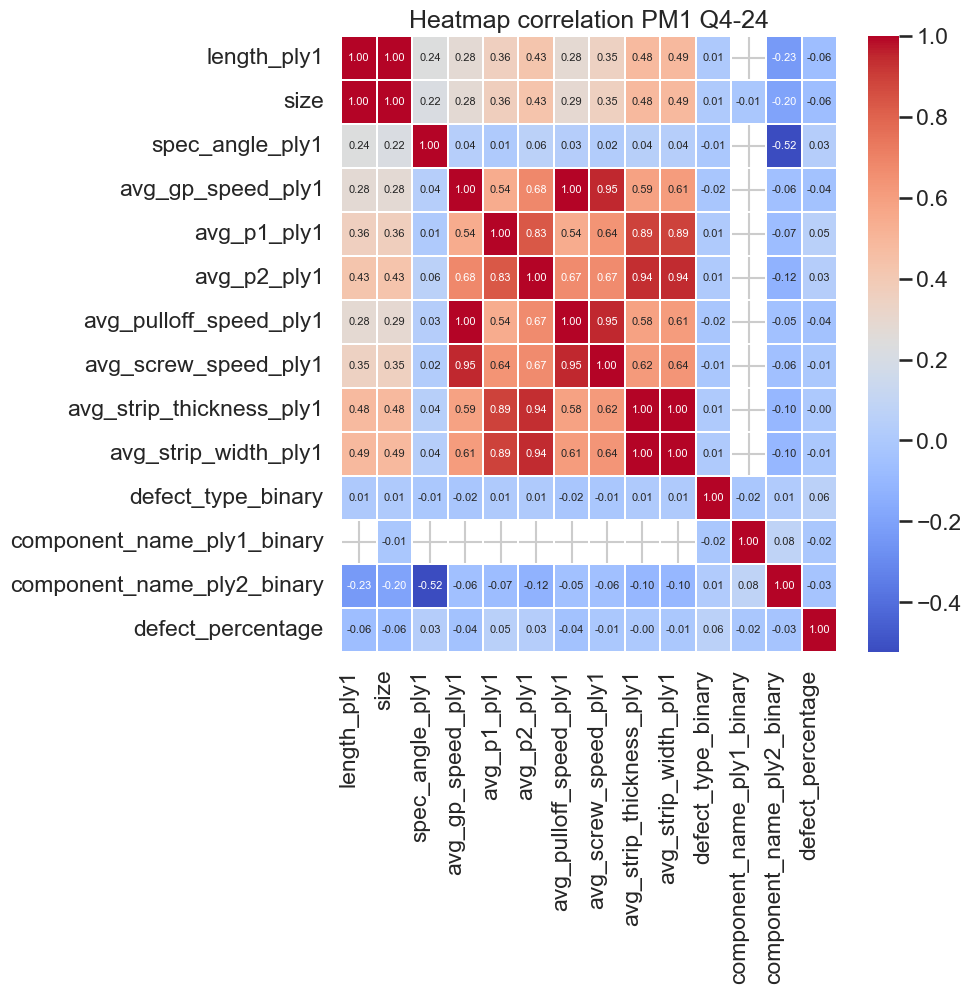

In [84]:
plt.figure(figsize=(8,8))

sns.heatmap(corr_matrix_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, annot_kws={"size": 8})
# Rotate axis labels for better readability
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap correlation PM1 Q4-24')
# plt.tight_layout()
plt.show()

In [373]:
print(q4_24['spec_angle_ply2'].describe().T)

count    21545.0
mean        92.0
std          0.0
min         92.0
25%         92.0
50%         92.0
75%         92.0
max         92.0
Name: spec_angle_ply2, dtype: float64


In [78]:
# Build the correlation matrix
corr_matrix_df2 = q1_25[['length_ply1','size','spec_angle_ply1','avg_gp_speed_ply1', 'avg_p1_ply1','avg_p2_ply1','avg_pulloff_speed_ply1','avg_screw_speed_ply1',
                       'avg_strip_thickness_ply1','avg_strip_width_ply1','defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary','defect_percentage']].corr()



KeyError: "['defect_percentage'] not in index"

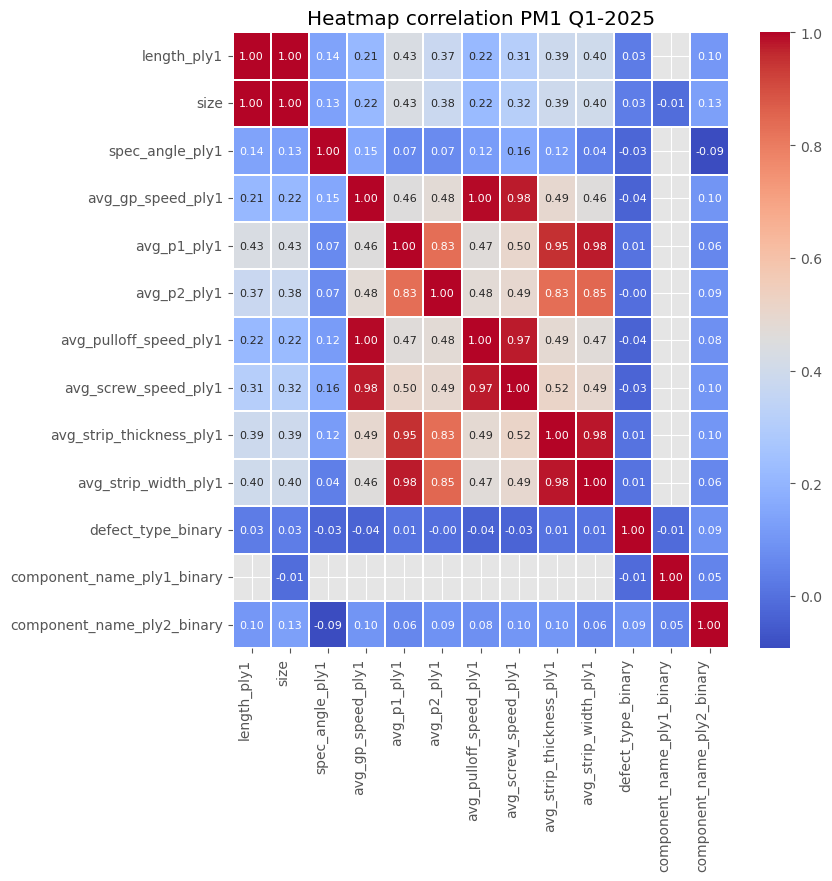

In [44]:
plt.figure(figsize=(8,8))

sns.heatmap(corr_matrix_df2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, annot_kws={"size": 8})
# Rotate axis labels for better readability
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap correlation PM1 Q1-2025')
# plt.tight_layout()
plt.show()

In [95]:
df.shape

(238167, 38)

In [98]:
df = df.query('18 <= size <= 23')

In [99]:
df.shape

(238167, 38)

<Axes: ylabel='Frequency'>

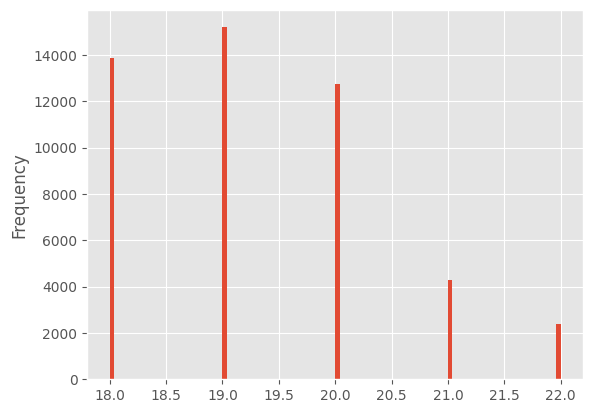

In [496]:
q4_24['size'].plot(kind='hist', bins=100)

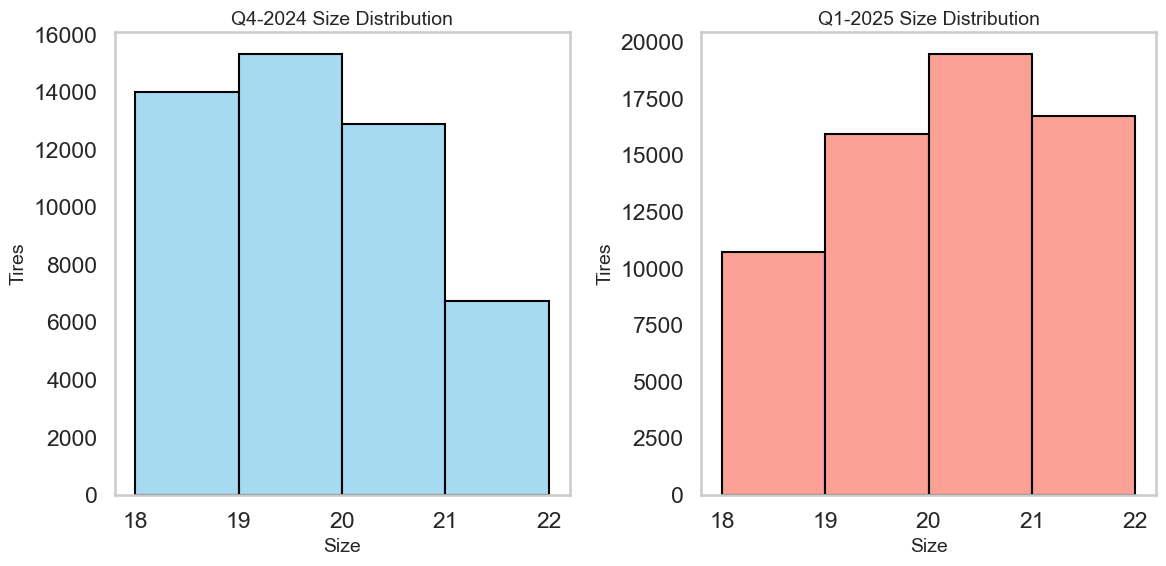

In [45]:
# Set the style and context for better aesthetics
sns.set(style="whitegrid", context="talk")

bins = [18,19,20,21,22]

# Create subplots (2 plots in one row)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Q4-24 Histogram
sns.histplot(q4_24['size'], kde=False, bins=bins, color='skyblue', edgecolor='black', ax=ax[0])
ax[0].set_title('Q4-2024 Size Distribution', fontsize=14)
ax[0].set_xlabel('Size', fontsize=14)
ax[0].set_ylabel('Tires', fontsize=14)
ax[0].grid(False)

# Q1-25 Histogram
sns.histplot(q1_25['size'], kde=False, bins=bins, color='salmon', edgecolor='black', ax=ax[1])
ax[1].set_title('Q1-2025 Size Distribution', fontsize=14)
ax[1].set_xlabel('Size', fontsize=14)
ax[1].set_ylabel('Tires', fontsize=14)
ax[1].grid(False)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


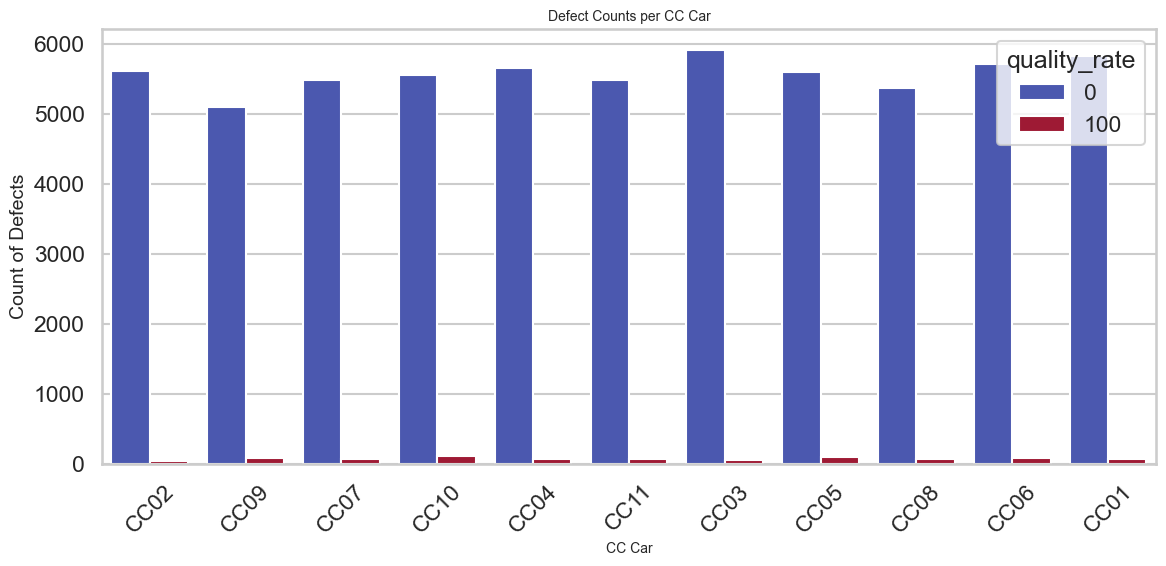

In [108]:
# Set the style for better aesthetics
sns.set(style="whitegrid", context="talk")

# Create a countplot to show the number of defects (0 and 1) for each cc_car
plt.figure(figsize=(12, 6))
sns.countplot(x='cc_car', hue='quality_rate', data=q1_25, palette='coolwarm')

# Add labels and title
plt.title('Defect Counts per CC Car', fontsize=10)
plt.xlabel('CC Car', fontsize=10)
plt.ylabel('Count of Defects', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


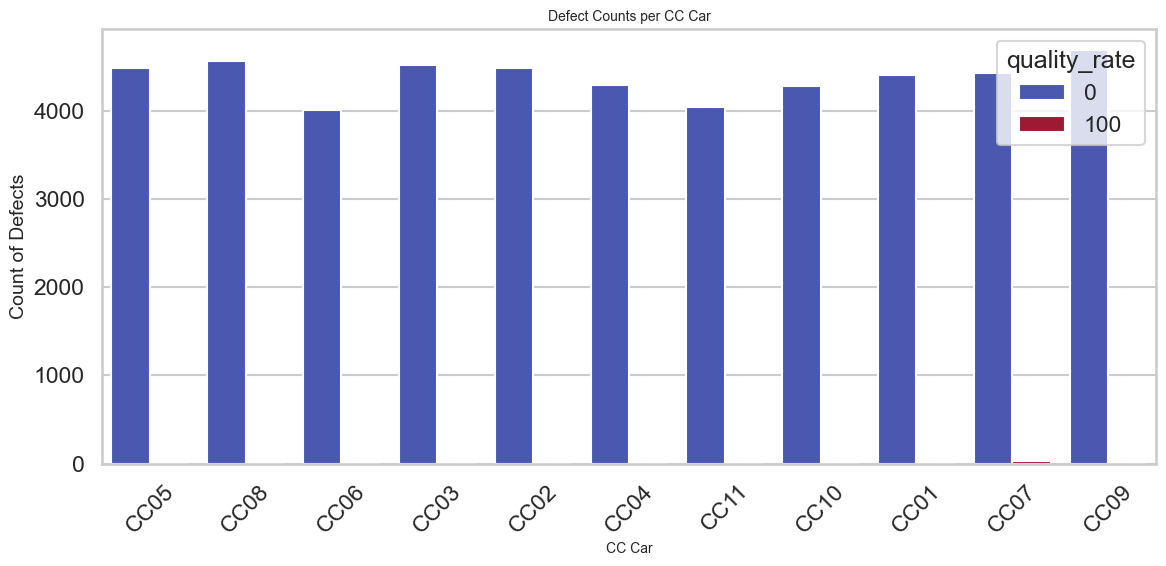

In [110]:
# Set the style for better aesthetics
sns.set(style="whitegrid", context="talk")

# Create a countplot to show the number of defects (0 and 1) for each cc_car
plt.figure(figsize=(12, 6))
sns.countplot(x='cc_car', hue='quality_rate', data=q4_24, palette='coolwarm')

# Add labels and title
plt.title('Defect Counts per CC Car', fontsize=10)
plt.xlabel('CC Car', fontsize=10)
plt.ylabel('Count of Defects', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
df_open = df[df['defect_name'] == 'OPEN PLY SPLICE']

In [381]:
df_open.head()

build_dt cc_car component_name_ply1 component_name_ply2  \
353   2024-10-01 11:23:39   CC04               PLY 1               PLY 2   
1331  2024-10-02 17:46:26   CC05               PLY 1               PLY 2   
1902  2024-10-03 07:24:27   CC04               PLY 1                 NaN   
1905  2024-10-03 07:48:31   CC04               PLY 1                 NaN   
1907  2024-10-03 07:57:04   CC02               PLY 1                 NaN   

     defect_type  length_ply1  length_ply2 spec_name  size  quality_rate  \
353            G    1387.5048    1395.5972     80KW1  18.0           100   
1331           G    1389.8225    1399.2925     80LM1  18.0           100   
1902           G    1471.0286          NaN     2UJA9  19.0           100   
1905           G    1470.2100          NaN     2UJA9  19.0           100   
1907           G    1470.1409          NaN     4NJAK  19.0           100   

          defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
353   OPEN PLY SPLICE             88.0             92.0               NaN   
1331  OPEN PLY SPLICE             88.0             92.0               NaN   
1902  OPEN PLY SPLICE             86.0              NaN               NaN   
1905  OPEN PLY SPLICE             86.0              NaN               NaN   
1907  OPEN PLY SPLICE             86.0              NaN               NaN   

      spec_length_ply2 TEAM_BUILD  width PLY 1  width PLY 2  \
353                NaN          A        698.0        570.0   
1331               NaN          C        698.0        570.0   
1902               NaN          A        512.0          NaN   
1905               NaN          A        512.0          NaN   
1907               NaN          A        560.0          NaN   

      defect_type_binary  component_name_ply1_binary  \
353                    1                           1   
1331                   1                           1   
1902                   1                           1   
1905                   1                           1   
1907                   1                           1   

      component_name_ply2_binary  avg_gp_speed_ply1  avg_gp_speed_ply2  \
353                            1          11.683900           2.704033   
1331                           1           4.409533           2.871400   
1902                           0           6.612233                NaN   
1905                           0           6.612533                NaN   
1907                           0           6.611533                NaN   

      avg_p1_ply1  avg_p1_ply2  avg_p2_ply1  avg_p2_ply2  \
353     79.783333    80.266667   124.483333   120.703333   
1331    80.516667    80.366667   128.636667   160.813333   
1902   120.500000          NaN   192.220000          NaN   
1905   119.183333          NaN   189.163333          NaN   
1907   119.633333          NaN   189.536667          NaN   

      avg_pulloff_speed_ply1  avg_pulloff_speed_ply2  avg_screw_speed_ply1  \
353                 7.346533                2.001600              16.17210   
1331                2.667633                1.999967               5.29225   
1902                4.000200                     NaN              10.94780   
1905                4.000767                     NaN              11.11785   
1907                3.999767                     NaN              11.42255   

      avg_screw_speed_ply2  avg_strip_thickness_ply1  \
353                 3.9637                  0.963900   
1331                4.0985                  0.984267   
1902                   NaN                  1.478567   
1905                   NaN                  1.478433   
1907                   NaN                  1.480733   

      avg_strip_thickness_ply2  avg_strip_width_ply1  avg_strip_width_ply2  \
353                   0.816167             54.516800             53.928767   
1331                  0.826167             54.531400             54.078667   
1902                       NaN             81.753333                   NaN   


In [ ]:
# df_open['date'] = pd.to_datetime(df_open['build_dt']).dt.date

# df_open['defect_flag'] = df_open['quality_rate'].apply(lambda x: 0 if x == 0 else 1)

# defect_open_per_day = df_open.groupby('date')['defect_flag'].agg(['sum', 'count'])
# defect_open_per_day['defect_percentage'] = (defect_open_per_day['sum'] / defect_open_per_day['count']) * 100

# # Merge defect_per_day with the original dataframe (df) based on the 'date'
# df = pd.merge(df, defect_open_per_day[['defect_percentage']], left_on='date', right_index=True, how='left')

In [50]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1',
       'width PLY 2', 'defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary', 'avg_gp_speed_ply1', 'avg_gp_speed_ply2',
       'avg_p1_ply1', 'avg_p1_ply2', 'avg_p2_ply1', 'avg_p2_ply2',
       'avg_pulloff_speed_ply1', 'avg_pulloff_speed_ply2',
       'avg_screw_speed_ply1', 'avg_screw_speed_ply2',
       'avg_strip_thickness_ply1', 'avg_strip_thickness_ply2',
       'avg_strip_width_ply1', 'avg_strip_width_ply2'],
      dtype='object')

In [67]:
df['defect_flag'].describe()

count    238219.000000
mean          0.008899
std           0.093916
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: defect_flag, dtype: float64

In [66]:
df['defect_flag'] = df['quality_rate'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df[['date','defect_name']]

In [ ]:
df['date'] = pd.to_datetime(df['build_dt']).dt.date
defect_per_day = df.groupby('date')['defect_flag'].agg(['sum', 'count'])
defect_per_day['defect_percentage'] = (defect_per_day['sum'] / defect_per_day['count']) * 100
print(defect_per_day)

In [74]:
# Merge defect_per_day with the original dataframe (df) based on the 'date'
df = pd.merge(df, defect_per_day[['defect_percentage']], left_on='date', right_index=True, how='left')

In [77]:
df.query('defect_name == "OPEN PLY SPLICE"').head(10)

build_dt cc_car component_name_ply1 component_name_ply2  \
1372 2024-01-08 10:09:53   CC03               PLY 1                 NaN   
1407 2024-01-08 11:25:52   CC08               PLY 1                 NaN   
1424 2024-01-08 11:58:23   CC10               PLY 1                 NaN   
1528 2024-01-08 13:51:19   CC04               PLY 1                 NaN   
1688 2024-01-08 17:30:19   CC11               PLY 1                 NaN   
1853 2024-01-08 21:08:59   CC05               PLY 1                 NaN   
1881 2024-01-08 21:34:50   CC10               PLY 1                 NaN   
1963 2024-01-08 23:04:06   CC03               PLY 1                 NaN   
2005 2024-01-08 23:50:34   CC10               PLY 1                 NaN   
2376 2024-01-09 07:21:45   CC11               PLY 1                 NaN   

     defect_type  length_ply1  length_ply2 spec_name  size  quality_rate  \
1372           G    1466.9790          NaN     5AJU1  19.0         100.0   
1407           G    1622.7139          NaN     NNJA3  21.0         100.0   
1424           G    1462.5688          NaN     E6KN1  19.0         100.0   
1528           G    1542.0446          NaN     5XKK1  20.0         100.0   
1688           G    1367.9031          NaN     JWKL1  18.0         100.0   
1853           G    1369.3074          NaN     5LLT1  18.0         100.0   
1881           G    1449.0895          NaN     BTJN1  19.0         100.0   
1963           G    1463.1611          NaN     5AJU1  19.0         100.0   
2005           G    1464.1545          NaN     E6KN1  19.0         100.0   
2376           G    1383.4193          NaN     E2JT1  18.0         100.0   

          defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
1372  OPEN PLY SPLICE             88.0              NaN               NaN   
1407  OPEN PLY SPLICE             90.0              NaN               NaN   
1424  OPEN PLY SPLICE             90.0              NaN               NaN   
1528  OPEN PLY SPLICE             86.0              NaN               NaN   
1688  OPEN PLY SPLICE             90.0              NaN               NaN   
1853  OPEN PLY SPLICE             88.0              NaN               NaN   
1881  OPEN PLY SPLICE             90.0              NaN               NaN   
1963  OPEN PLY SPLICE             88.0              NaN               NaN   
2005  OPEN PLY SPLICE             90.0              NaN               NaN   
2376  OPEN PLY SPLICE             90.0              NaN               NaN   

      spec_length_ply2 TEAM_BUILD  width PLY 1  width PLY 2  \
1372               NaN          C        587.0          NaN   
1407               NaN          C        492.0          NaN   
1424               NaN          C        506.0          NaN   
1528               NaN          C        603.0          NaN   
1688               NaN          B        596.0          NaN   
1853               NaN          B        568.0          NaN   
1881               NaN          B        516.0          NaN   
1963               NaN          A        587.0          NaN   
2005               NaN          A        506.0          NaN   
2376               NaN          C        538.0          NaN   

      defect_type_binary  component_name_ply1_binary  \
1372                   1                           1   
1407                   1                           1   
1424                   1                           1   
1528                   1                           1   
1688                   1                           1   
1853                   1                           1   
1881                   1                           1   
1963                   1                           1   
2005                   1                           1   
2376                   1                           1   

      component_name_ply2_binary  avg_gp_speed_ply1  avg_gp_speed_ply2  \
1372                           0           7.779367                NaN   
1407                           0           0.0

In [85]:
df.describe().T

count                           mean  \
build_dt                      238219  2024-09-08 03:29:39.786943488   
length_ply1                 232422.0                    1513.908374   
length_ply2                  76979.0                    1508.573528   
size                        238219.0                      19.523418   
quality_rate                238213.0                       0.887441   
spec_angle_ply1             232422.0                      88.343711   
spec_angle_ply2              76979.0                      92.000572   
spec_length_ply1              7606.0                    1630.055745   
spec_length_ply2              3227.0                    1634.235823   
width PLY 1                 232422.0                     569.485501   
width PLY 2                  76979.0                     519.667818   
defect_type_binary          238219.0                       0.008874   
component_name_ply1_binary  238219.0                       0.975665   
component_name_ply2_binary  238219.0                       0.323144   
avg_gp_speed_ply1           232422.0                      16.227344   
avg_gp_speed_ply2            76979.0                       7.444029   
avg_p1_ply1                 232422.0                      77.971794   
avg_p1_ply2                  76979.0                      76.685843   
avg_p2_ply1                 232422.0                     168.044855   
avg_p2_ply2                  76979.0                     181.505115   
avg_pulloff_speed_ply1      232422.0                      10.173748   
avg_pulloff_speed_ply2       76979.0                       5.507506   
avg_screw_speed_ply1        232422.0                      22.101998   
avg_screw_speed_ply2         76979.0                      10.776587   
avg_strip_thickness_ply1    232422.0                       1.252743   
avg_strip_thickness_ply2     76979.0                       1.061752   
avg_strip_width_ply1        232422.0                      72.343697   
avg_strip_width_ply2         76979.0                      71.475853   
defect_flag                 238219.0                       0.008899   
defect_percentage           238219.0                       0.889937   

                                            min                         25%  \
build_dt                    2024-01-04 22:27:43  2024-05-08 20:21:12.500000   
length_ply1                           1364.0881                   1462.1936   
length_ply2                           1387.6484                  1408.62455   
size                                       18.0                        19.0   
quality_rate                                0.0                         0.0   
spec_angle_ply1                            86.0                        88.0   
spec_angle_ply2                            92.0                        92.0   
spec_length_ply1                         1463.0                      1557.0   
spec_length_ply2                         1476.0                      1560.0   
width PLY 1                               424.0                       533.0   
width PLY 2                               423.0                       512.0   
defect_type_binary                          0.0                         0.0   
component_name_ply1_binary                  0.0                         1.0   
component_name_ply2_binary                  0.0                         0.0   
avg_gp_speed_ply1                           0.0                   10.593658   
avg_gp_speed_ply2                           0.0                    4.207633   
avg_p1_ply1                                 0.0                   61.116667   
avg_p1_ply2                                 0.0                   61.166667   
avg_p2_ply1                           -7.513333                  135.146667   
avg_p2_ply2                                 0.0                      149.94   
avg_pulloff_speed_ply1                      0.0                    6.839125   
avg_pulloff_speed_ply2                      0.0                    3.070383   
avg_screw_sp

In [150]:
# Display the defect percentage per day
print(defect_per_day)

            sum  count  defect_percentage
date                                     
2024-10-01    1    887           0.112740
2024-10-02    1    659           0.151745
2024-10-03    8    772           1.036269
2024-10-04    6    560           1.071429
2024-10-05    0    459           0.000000
2024-10-07    0    552           0.000000
2024-10-08    1    717           0.139470
2024-10-09    0    993           0.000000
2024-10-10    0    633           0.000000
2024-10-11    0    888           0.000000
2024-10-12    0    515           0.000000
2024-10-14    1    460           0.217391
2024-10-15    2    750           0.266667
2024-10-16    3   1049           0.285987
2024-10-17    1    940           0.106383
2024-10-18    0    863           0.000000
2024-10-19    0    392           0.000000
2024-10-21    2    761           0.262812
2024-10-22    0    828           0.000000
2024-10-23    2    857           0.233372
2024-10-24    3    956           0.313808
2024-10-25    2    592           0

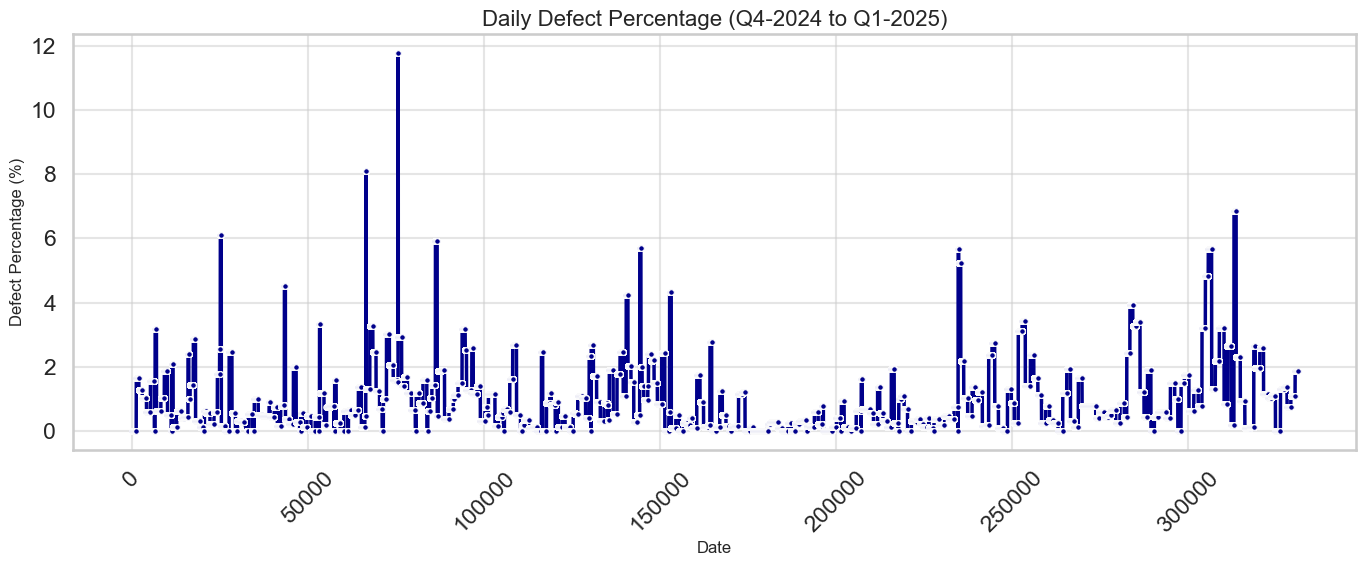

In [86]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df,
    x=df.index,
    y='defect_percentage',
    color='darkblue',
    linewidth=2.5,
    marker='o',
    markersize=4
)
plt.title('Daily Defect Percentage (Q4-2024 to Q1-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Defect Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [87]:
df = df.reset_index(drop=True)

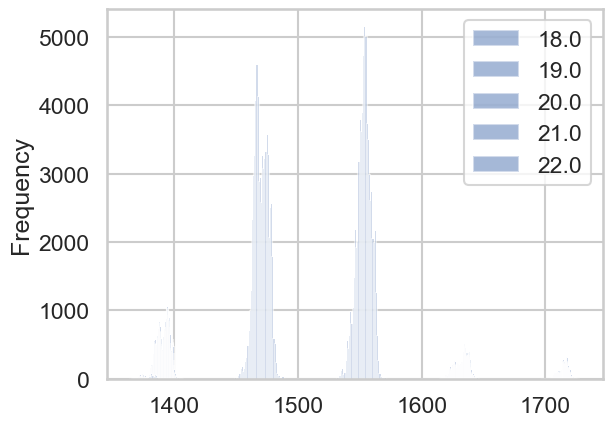

In [88]:
df.groupby('size')['length_ply1'].plot(kind='hist', bins=200, alpha=0.5, legend=True, subplots=True, sharex=True, sharey=True)
plt.show()

In [89]:
df = df[df['size'] <= 23]

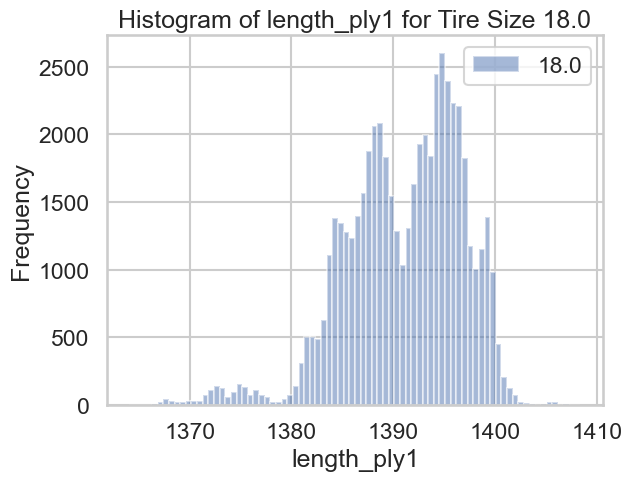

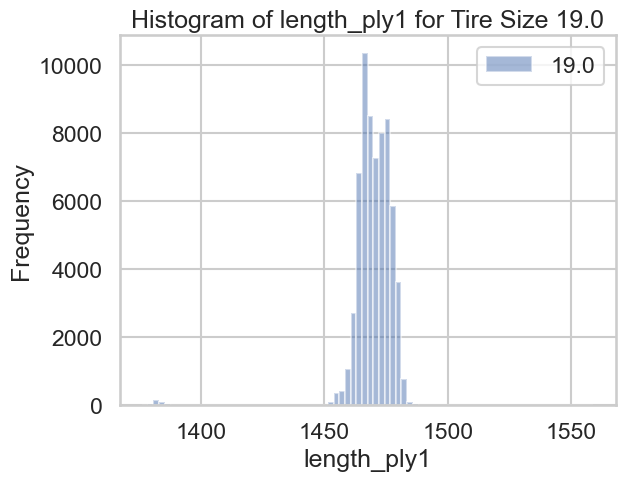

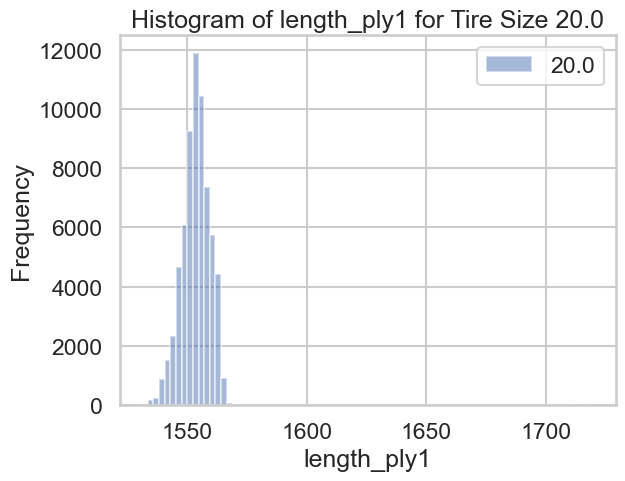

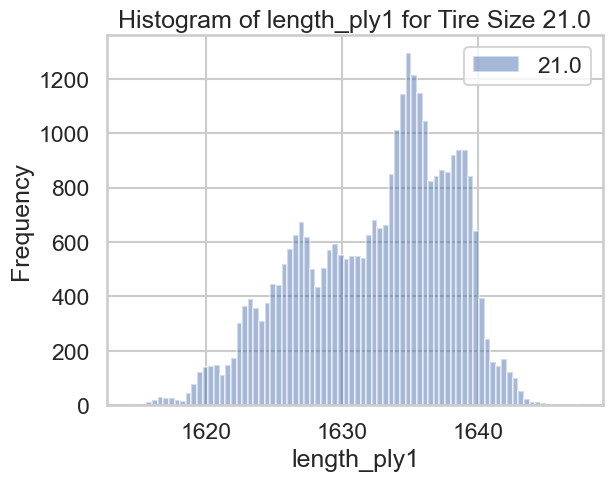

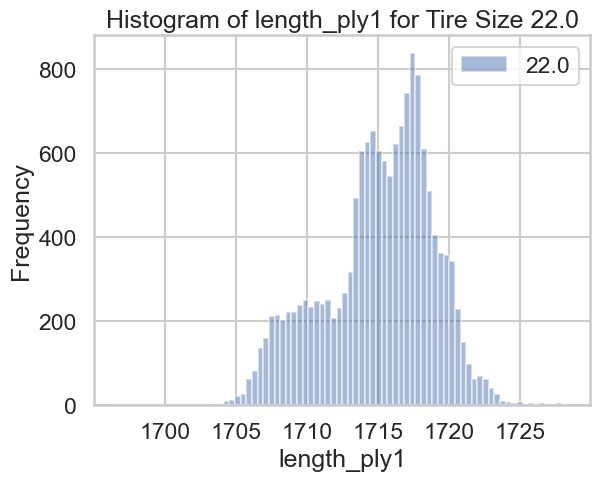

In [90]:
import matplotlib.pyplot as plt

for size, group in df.groupby('size'):
    group['length_ply1'].plot(kind='hist', bins=80, alpha=0.5, label=str(size), legend=True)
    plt.title(f"Histogram of length_ply1 for Tire Size {size}")
    plt.xlabel('length_ply1')
    plt.ylabel('Frequency')

    plt.show()

<Axes: ylabel='Frequency'>

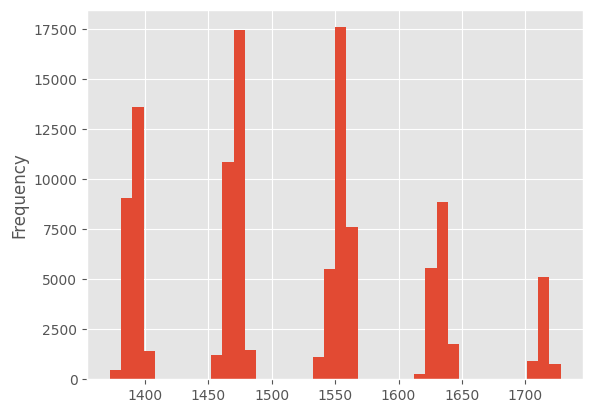

In [510]:
df['length_ply1'].plot(kind='hist', bins=40)

In [397]:
df.shape

(110552, 39)

In [512]:
df[df['component_name_ply1'] == 'PLY 1'].shape[0]

110511

In [514]:
df[df['component_name_ply2'] == 'PLY 2'].shape[0]


34250

In [516]:
df[(df['component_name_ply1'] != 'PLY 1') & (df['component_name_ply2'] == 'PLY 2')].shape[0]


41

In [518]:
df[(df['component_name_ply1'] == 'PLY 1') & (df['component_name_ply2'] != 'PLY 2')].shape[0]

76302

In [539]:
df.tail(5)

bt_car component_name_ply1 component_name_ply2 defect_type  \
233003   BT04               PLY 1                 NaN         NaN   
233004   BT01               PLY 1                 NaN         NaN   
233005   BT03               PLY 1               PLY 2         NaN   
233006   BT05               PLY 1               PLY 2         NaN   
233007   BT02               PLY 1                 NaN         NaN   

        length_ply1  length_ply2 spec_name revision  size  defect_rate  \
233003    1557.9626          NaN     9AJU1    P0003  20.0          0.0   
233004    1637.2220          NaN     D3JC1    P0002  21.0          0.0   
233005    1708.1909    1722.8074     UWJA1    P0004  22.0          0.0   
233006    1624.4137    1639.9670     7LJE1    P0008  21.0          0.0   
233007    1627.4159          NaN     JLJJ1    P0004  21.0          0.0   

       defect_name  spec_angle_ply1  spec_angle_ply2  spec_length_ply1  \
233003         NaN             90.0              NaN            1559.0   
233004         NaN             86.0              NaN            1637.0   
233005         NaN             88.0             92.0            1708.0   
233006         NaN             88.0             92.0            1624.0   
233007         NaN             90.0              NaN            1628.0   

        spec_length_ply2 TEAM_BUILD  width PLY 1  width PLY 2  \
233003               NaN          A        508.0          NaN   
233004               NaN          A        513.0          NaN   
233005            1724.0          A        627.0        548.0   
233006            1640.0          A        612.0        512.0   
233007               NaN          A        506.0          NaN   

        defect_type_encoded  component_name_ply1_encoded  \
233003                    0                            1   
233004                    0                            1   
233005                    0                            1   
233006                    0                            1   
233007                    0                            1   

        component_name_ply2_encoded  avg_gp_speed_ply1  avg_gp_speed_ply2  \
233003                            0          25.018533                NaN   
233004                            0          25.611767                NaN   
233005                            1          25.632033           6.909000   
233006                            1          25.631600           6.911133   
233007                            0           0.000000                NaN   

        avg_p1_ply1  avg_p1_ply2  avg_p2_ply1  avg_p2_ply2  \
233003    76.900000          NaN   218.073333          NaN   
233004    79.550000          NaN   217.653333          NaN   
233005    74.233333    79.833333   213.850000   233.263333   
233006    84.383333    79.650000   215.040000   233.310000   
233007     0.000000          NaN     0.000000          NaN   

        avg_pulloff_speed_ply1  avg_pulloff_speed_ply2  avg_screw_speed_ply1  \
233003               15.618333                     NaN              38.11220   
233004               15.986367                     NaN              37.94165   
233005               15.999867                4.998967              38.45525   
233006               15.999500                5.000833              37.66430   
233007                0.000000                     NaN               0.00000   

        avg_screw_speed_ply2  avg_thickness_ply1  avg_thickness_ply2  \
233003                   NaN            1.399967                 NaN   
233004                   NaN            1.398967                 NaN   
233005              8.798067            1.393400            1.204000   
233006              9.850167            1.398400            1.203867   
233007                   NaN            0.000000                 NaN   

        avg_strip_width_ply1  avg_strip_width_ply2  spec_name_encoded  \
233003             81.663867                   NaN                109   
233004             81.672267                   NaN    

In [407]:
df['component_name_ply1'].describe()

count     110511
unique         1
top        PLY 1
freq      110511
Name: component_name_ply1, dtype: object

In [409]:
df.columns

Index(['build_dt', 'cc_car', 'component_name_ply1', 'component_name_ply2',
       'defect_type', 'length_ply1', 'length_ply2', 'spec_name', 'size',
       'quality_rate', 'defect_name', 'spec_angle_ply1', 'spec_angle_ply2',
       'spec_length_ply1', 'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1',
       'width PLY 2', 'defect_type_binary', 'component_name_ply1_binary',
       'component_name_ply2_binary', 'avg_gp_speed_ply1', 'avg_gp_speed_ply2',
       'avg_p1_ply1', 'avg_p1_ply2', 'avg_p2_ply1', 'avg_p2_ply2',
       'avg_pulloff_speed_ply1', 'avg_pulloff_speed_ply2',
       'avg_screw_speed_ply1', 'avg_screw_speed_ply2',
       'avg_strip_thickness_ply1', 'avg_strip_thickness_ply2',
       'avg_strip_width_ply1', 'avg_strip_width_ply2', 'spec_name_encoded',
       'date', 'defect_flag', 'defect_percentage'],
      dtype='object')

In [100]:
df.shape

(238167, 38)

In [101]:
df = df.query("not (component_name_ply1.notnull() and component_name_ply2.notnull())")

In [102]:
df = df.query("not component_name_ply1.isnull()")

In [103]:
df.shape

(155935, 38)

In [602]:
df = df[[#'bt_car',
    #'component_name_ply1', 'component_name_ply2', 'defect_type',
       'length_ply1', 
    #'length_ply2', 
    'spec_name', 
    #'revision', 
    'size','quality_rate','defect_name', 'spec_angle_ply1', #'spec_angle_ply2',
       'spec_length_ply1', #'spec_length_ply2', 
    'TEAM_BUILD', 'width PLY 1',
       #'width PLY 2', 'defect_type_encoded', 'component_name_ply1_encoded',
      # 'component_name_ply2_encoded', 
    'avg_gp_speed_ply1', #'avg_gp_speed_ply2',
       'avg_p1_ply1', #'avg_p1_ply2', 
    'avg_p2_ply1', #'avg_p2_ply2',
       'avg_pulloff_speed_ply1', #'avg_pulloff_speed_ply2',
       'avg_screw_speed_ply1', #'avg_screw_speed_ply2', 
    'avg_strip_thickness_ply1',#'avg_thickness_ply2', 
    'avg_strip_width_ply1', #'avg_strip_width_ply2',
       #'spec_name_encoded', 'cc_car_CC01', 'cc_car_CC02', 'cc_car_CC03',
       #'cc_car_CC04', 'cc_car_CC05', 'cc_car_CC06', 'cc_car_CC07',
       #'cc_car_CC08', 'cc_car_CC09', 'cc_car_CC10', 'cc_car_CC11', 'cc_car',
       'date', #'defect_flag',
    'defect_percentage']].copy()

In [421]:
df.describe().T

count         mean        std        min  \
length_ply1               76302.0  1522.967570  91.848167  1379.1782   
size                      76302.0    19.603536   1.137576    18.0000   
quality_rate              76302.0     0.555687   7.433747     0.0000   
spec_angle_ply1           76302.0    88.694110   1.764271    86.0000   
spec_length_ply1           2372.0  1631.493255  65.101572  1534.0000   
width PLY 1               76302.0   537.538977  46.907031   424.0000   
avg_gp_speed_ply1         76302.0    16.519273   7.598641     0.0000   
avg_p1_ply1               76302.0    73.887722  17.878844     0.0000   
avg_p2_ply1               76302.0   189.248241  51.522653    -5.7400   
avg_pulloff_speed_ply1    76302.0    10.284182   4.669603     0.0000   
avg_screw_speed_ply1      76302.0    20.808857  10.994851     0.0000   
avg_strip_thickness_ply1  76302.0     1.271654   0.297956     0.0000   
avg_strip_width_ply1      76302.0    73.628963  17.078860     0.0000   
defect_percentage         76302.0     0.868349   1.008526     0.0000   

                                  25%          50%          75%          max  
length_ply1               1471.639425  1549.788950  1562.717975  1727.756800  
size                        19.000000    20.000000    20.000000    22.000000  
quality_rate                 0.000000     0.000000     0.000000   100.000000  
spec_angle_ply1             86.000000    90.000000    90.000000    92.000000  
spec_length_ply1          1555.000000  1629.000000  1711.000000  1717.000000  
width PLY 1                508.000000   540.000000   568.000000   698.000000  
avg_gp_speed_ply1           10.582808    17.135400    23.559167    28.553067  
avg_p1_ply1                 76.016667    79.750000    81.266667   129.333333  
avg_p2_ply1                167.603333   203.770000   220.733333   304.756667  
avg_pulloff_speed_ply1       6.824625    10.666300    14.999167    18.000800  
avg_screw_speed_ply1        11.852813    20.173925    30.827813    75.134950  
avg_strip_thickness_ply1     1.224775     1.413900     1.434867     1.491567  
avg_strip_width_ply1        80.948308    81.490933    81.619758    82.133100  
defect_percentage            0.194553     0.572738     1.188707     6.860158

In [91]:
df.to_csv('latest_data_rev10.csv', index=False)

In [1000]:
df = pd.read_csv('latest_data_rev0.csv')

In [648]:
df.head()

length_ply1 spec_name  size  quality_rate defect_name  spec_angle_ply1  \
0    1473.4756     2VLA1  19.0             0         NaN             86.0   
1    1552.1769     5XKC1  20.0             0         NaN             88.0   
2    1555.5811     K6JF1  20.0             0         NaN             88.0   
3    1472.9708     2VLA1  19.0             0         NaN             86.0   
4    1383.7253     E4LE1  18.0             0         NaN             90.0   

   spec_length_ply1 TEAM_BUILD  width PLY 1  avg_gp_speed_ply1  avg_p1_ply1  \
0               NaN          B        509.0          25.440333   118.533333   
1               NaN          B        589.0           0.000000     0.000000   
2               NaN          B        575.0          25.447933   116.666667   
3               NaN          B        509.0          25.447000   117.033333   
4               NaN          B        597.0          16.964733    81.516667   

   avg_p2_ply1  avg_pulloff_speed_ply1  avg_screw_speed_ply1  \
0   187.786667               15.996467               46.8567   
1     0.000000                0.000000                0.0000   
2   181.883333               15.999167               45.9058   
3   184.006667               15.999533               46.4883   
4   121.683333               10.666367               22.1499   

   avg_strip_thickness_ply1  avg_strip_width_ply1        date  \
0                  1.434467             81.695667  2024-10-01   
1                  0.000000              0.000000  2024-10-01   
2                  1.442000             81.643867  2024-10-01   
3                  1.436900             81.622133  2024-10-01   
4                  0.957033             54.419967  2024-10-01   

   defect_percentage  
0            0.11274  
1            0.11274  
2            0.11274  
3            0.11274  
4            0.11274

In [608]:
df.describe().T

count         mean        std        min  \
length_ply1               76302.0  1522.967570  91.848167  1379.1782   
size                      76302.0    19.603536   1.137576    18.0000   
quality_rate              76302.0     0.555687   7.433747     0.0000   
spec_angle_ply1           76302.0    88.694110   1.764271    86.0000   
spec_length_ply1           2372.0  1631.493255  65.101572  1534.0000   
width PLY 1               76302.0   537.538977  46.907031   424.0000   
avg_gp_speed_ply1         76302.0    16.519273   7.598641     0.0000   
avg_p1_ply1               76302.0    73.887722  17.878844     0.0000   
avg_p2_ply1               76302.0   189.248241  51.522653    -5.7400   
avg_pulloff_speed_ply1    76302.0    10.284182   4.669603     0.0000   
avg_screw_speed_ply1      76302.0    20.808857  10.994851     0.0000   
avg_strip_thickness_ply1  76302.0     1.271654   0.297956     0.0000   
avg_strip_width_ply1      76302.0    73.628963  17.078860     0.0000   
defect_percentage         76302.0     0.868349   1.008526     0.0000   

                                  25%          50%          75%          max  
length_ply1               1471.639425  1549.788950  1562.717975  1727.756800  
size                        19.000000    20.000000    20.000000    22.000000  
quality_rate                 0.000000     0.000000     0.000000   100.000000  
spec_angle_ply1             86.000000    90.000000    90.000000    92.000000  
spec_length_ply1          1555.000000  1629.000000  1711.000000  1717.000000  
width PLY 1                508.000000   540.000000   568.000000   698.000000  
avg_gp_speed_ply1           10.582808    17.135400    23.559167    28.553067  
avg_p1_ply1                 76.016667    79.750000    81.266667   129.333333  
avg_p2_ply1                167.603333   203.770000   220.733333   304.756667  
avg_pulloff_speed_ply1       6.824625    10.666300    14.999167    18.000800  
avg_screw_speed_ply1        11.852813    20.173925    30.827813    75.134950  
avg_strip_thickness_ply1     1.224775     1.413900     1.434867     1.491567  
avg_strip_width_ply1        80.948308    81.490933    81.619758    82.133100  
defect_percentage            0.194553     0.572738     1.188707     6.860158

In [92]:
df = df.query("not (size == 20 and length_ply1 > 1600)")

In [93]:
df.shape

(238167, 38)

In [640]:
df = df.query("(avg_strip_width_ply1 == 0) and (avg_strip_thickness_ply1 == 0)")

In [ ]:
df[df['size']==18].info

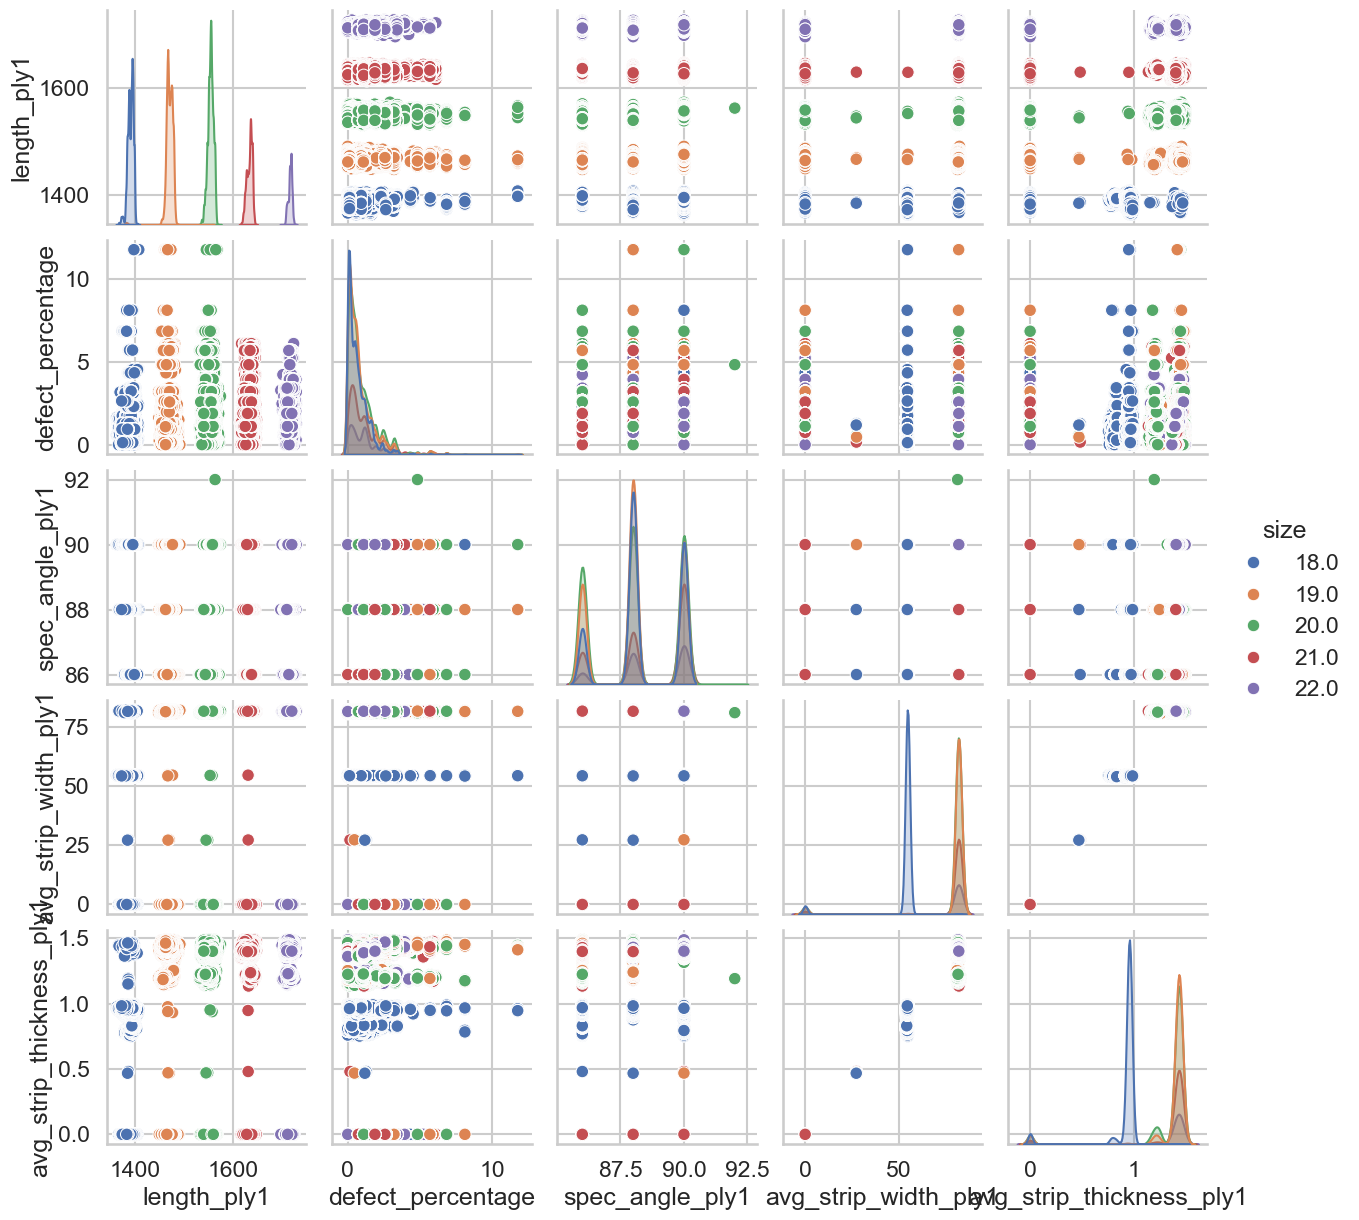

In [94]:
sns.pairplot(df,
            vars=['length_ply1','defect_percentage','spec_angle_ply1','avg_strip_width_ply1','avg_strip_thickness_ply1'
                 ],
            hue='size',
            palette='deep')
plt.show()

In [656]:
df.columns

Index(['length_ply1', 'spec_name', 'size', 'quality_rate', 'defect_name',
       'spec_angle_ply1', 'spec_length_ply1', 'TEAM_BUILD', 'width PLY 1',
       'avg_gp_speed_ply1', 'avg_p1_ply1', 'avg_p2_ply1',
       'avg_pulloff_speed_ply1', 'avg_screw_speed_ply1',
       'avg_strip_thickness_ply1', 'avg_strip_width_ply1', 'date',
       'defect_percentage'],
      dtype='object')

In [767]:
df_2025[['defect_name','defect_flag']].head(80)

defect_name  defect_flag
26945              NaN            0
26946  OPEN PLY SPLICE            1
26947              NaN            0
26948              NaN            0
26949              NaN            0
26950              NaN            0
26951              NaN            0
26952              NaN            0
26953              NaN            0
26954              NaN            0
26955              NaN            0
26956              NaN            0
26957              NaN            0
26958              NaN            0
26959              NaN            0
26960              NaN            0
26961              NaN            0
26962              NaN            0
26963              NaN            0
26964              NaN            0
26965              NaN            0
26966              NaN            0
26967              NaN            0
26968              NaN            0
26969              NaN            0
26970              NaN            0
26971              NaN            0
26972              NaN            0
26973              NaN            0
26974              NaN            0
26975              NaN            0
26976              NaN            0
26977              NaN            0
26978              NaN            0
26979              NaN            0
26980              NaN            0
26981              NaN            0
26982              NaN            0
26983              NaN            0
26984              NaN            0
26985              NaN            0
26986              NaN            0
26987              NaN            0
26988              NaN            0
26989              NaN            0
26990              NaN            0
26991              NaN            0
26992              NaN            0
26993              NaN            0
26994              NaN            0
26995              NaN            0
26996              NaN            0
26997              NaN            0
26998              NaN            0
26999              NaN            0
27000              NaN            0
27001              NaN            0
27002              NaN            0
27003              NaN            0
27004  OPEN PLY SPLICE            1
27005              NaN            0
27006              NaN            0
27007              NaN            0
27008              NaN            0
27009              NaN            0
27010              NaN            0
27011              NaN            0
27012              NaN            0
27013              NaN            0
27014              NaN            0
27015              NaN            0
27016              NaN            0
27017              NaN            0
27018              NaN            0
27019              NaN            0
27020              NaN            0
27021              NaN            0
27022              NaN            0
27023              NaN            0
27024              NaN            0

In [789]:
df_2025['defect_flag'] = df_2025['defect_name'].apply(lambda x: 1 if str(x).strip().upper() == 'OPEN PLY SPLICE' else 0)

In [805]:
df_24['defect_flag'] = df_24['defect_name'].apply(lambda x: 1 if str(x).strip().upper() == 'OPEN PLY SPLICE' else 0)

In [833]:
df['date'] = pd.to_datetime(df['date'])  # Ensure datetime format

In [ ]:
df_2025 = df[(df['date'] >= '2025-01-01') & (df['date'] < '2025-04-01')]

df_24 = df[(df['date'] >= '2024-10-01') & (df['date'] <= '2024-12-31')]

In [1201]:
top_defects = q1_25.groupby('spec_name')['defect_percentage'].mean()

In [1203]:
top_defect_sorted = top_defects.sort_values(ascending=False)

In [706]:
print(top_defect_sorted.head(10))

spec_name
KUJN1    6.860158
L8JB1    6.860158
49JA7    5.823627
A6JA3    5.823627
PHJE1    5.033557
82JAN    4.882812
12JAU    4.882812
HAJC1    4.501753
9UJA6    4.380462
K8JB1    4.286998
Name: defect_percentage, dtype: float64


In [1225]:
summary = q1_25.groupby('spec_name').agg(defect_percentage=('defect_percentage','mean'), tires=('spec_name','count'))\
.query('tires > 500')

In [1231]:
top_defect_sorted = summary[summary['defect_percentage']>=1].sort_values(by=['defect_percentage','tires'], ascending=[False,False])

In [1233]:
top_defect_sorted.head(20)

defect_percentage  tires
spec_name                          
2NJY1               1.989116    591
K6JM1               1.733900    525
5XKK1               1.661808   1262
84JBV               1.648054    940
43JAB               1.604300   1204
BNJAD               1.583388    693
NPJF1               1.573700    914
K1JA1               1.541908    798
9AJU1               1.498249   1247
87JM1               1.448264   1592
JLJJ1               1.353775   1247
6FJE1               1.349013    522
NNJA3               1.329390    547
BPJA7               1.257654   1664
4PJF1               1.255248    642
7UJAN               1.196980   1281
K6JK1               1.184914    723
BXJC1               1.161951    941
E2JT1               1.098830   1855
73JAF               1.071435    605

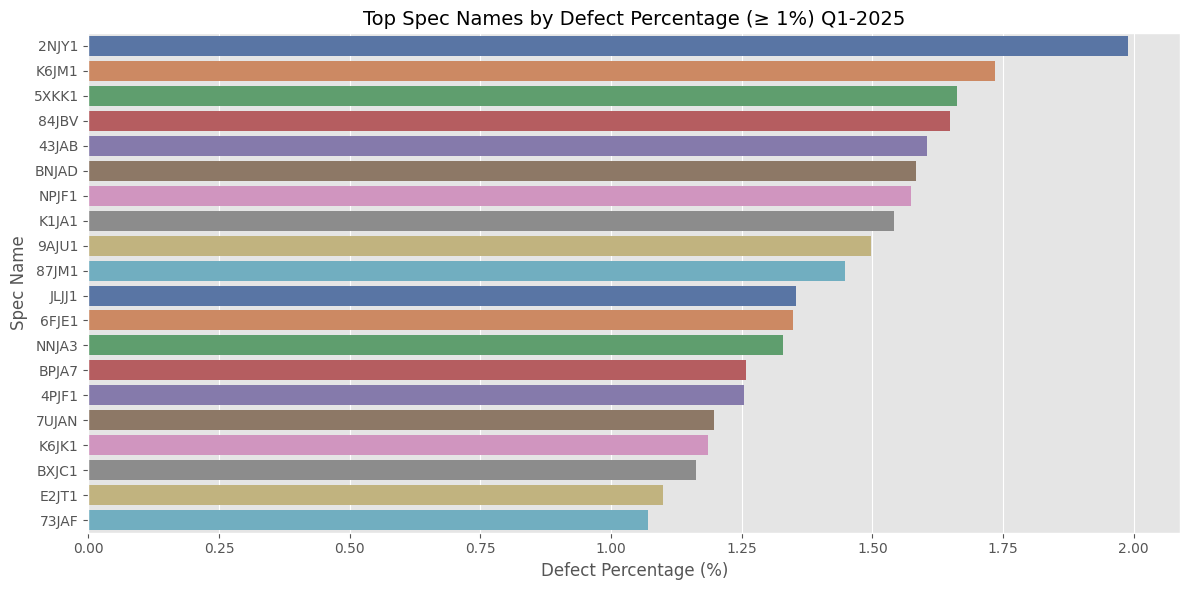

In [1235]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_defect_sorted.head(20),
    x='defect_percentage',
    y='spec_name',
    palette='deep'
)


plt.title('Top Spec Names by Defect Percentage (≥ 1%) Q1-2025', fontsize=14)
plt.xlabel('Defect Percentage (%)')
plt.ylabel('Spec Name')
plt.tight_layout()
plt.show()


In [775]:
df_original['length_ply1'] = pd.to_numeric(df_original['length_ply1'], errors='coerce')

In [801]:
# Merge the 'cc_car' column from df_original into df based on the 'length_ply1' column
df_24 = pd.merge(df_24, df_original[['length_ply1', 'cc_car']], on='length_ply1', how='left')

# Now merged_df contains 'cc_car' column from df_original merged with df based on 'length_ply1'


In [803]:
df_24.head()

length_ply1 spec_name  size  quality_rate defect_name  spec_angle_ply1  \
0    1473.4756     2VLA1  19.0             0         NaN             86.0   
1    1473.4756     2VLA1  19.0             0         NaN             86.0   
2    1552.1769     5XKC1  20.0             0         NaN             88.0   
3    1552.1769     5XKC1  20.0             0         NaN             88.0   
4    1555.5811     K6JF1  20.0             0         NaN             88.0   

   spec_length_ply1 TEAM_BUILD  width PLY 1  avg_gp_speed_ply1  avg_p1_ply1  \
0               NaN          B        509.0          25.440333   118.533333   
1               NaN          B        509.0          25.440333   118.533333   
2               NaN          B        589.0           0.000000     0.000000   
3               NaN          B        589.0           0.000000     0.000000   
4               NaN          B        575.0          25.447933   116.666667   

   avg_p2_ply1  avg_pulloff_speed_ply1  avg_screw_speed_ply1  \
0   187.786667               15.996467               46.8567   
1   187.786667               15.996467               46.8567   
2     0.000000                0.000000                0.0000   
3     0.000000                0.000000                0.0000   
4   181.883333               15.999167               45.9058   

   avg_strip_thickness_ply1  avg_strip_width_ply1        date  \
0                  1.434467             81.695667  2024-10-01   
1                  1.434467             81.695667  2024-10-01   
2                  0.000000              0.000000  2024-10-01   
3                  0.000000              0.000000  2024-10-01   
4                  1.442000             81.643867  2024-10-01   

   defect_percentage       data cc_car  
0            0.11274 2024-10-01   CC08  
1            0.11274 2024-10-01   CC03  
2            0.11274 2024-10-01   CC11  
3            0.11274 2024-10-01   CC07  
4            0.11274 2024-10-01   CC09

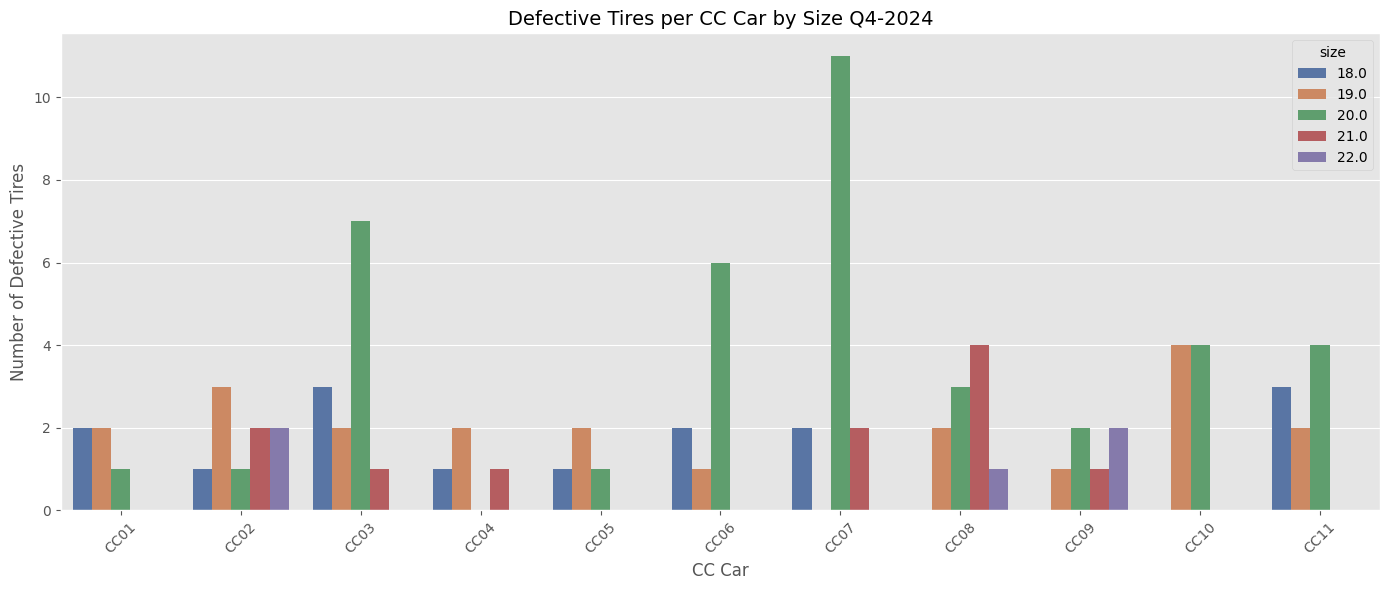

In [809]:
# Assuming 'defect_flag' column is already in the DataFrame where 1 means defect, and 0 means no defect
# If defect is based on a different column, use that column to identify defects

# Filter only rows where there is a defect (assuming 'defect_flag' indicates if there's a defect)
df_with_defects = df_24[df_24['defect_flag'] == 1]

# Group by 'cc_car' and 'size' to get the count of defective tires
grouped = df_with_defects.groupby(['cc_car', 'size']).size().reset_index(name='defective_tires_count')

# Create the plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='cc_car',
    y='defective_tires_count',
    hue='size',
    palette='deep'  # You can change the palette to suit your preferences
)

plt.title('Defective Tires per CC Car by Size Q4-2024', fontsize=14)
plt.xlabel('CC Car')
plt.ylabel('Number of Defective Tires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


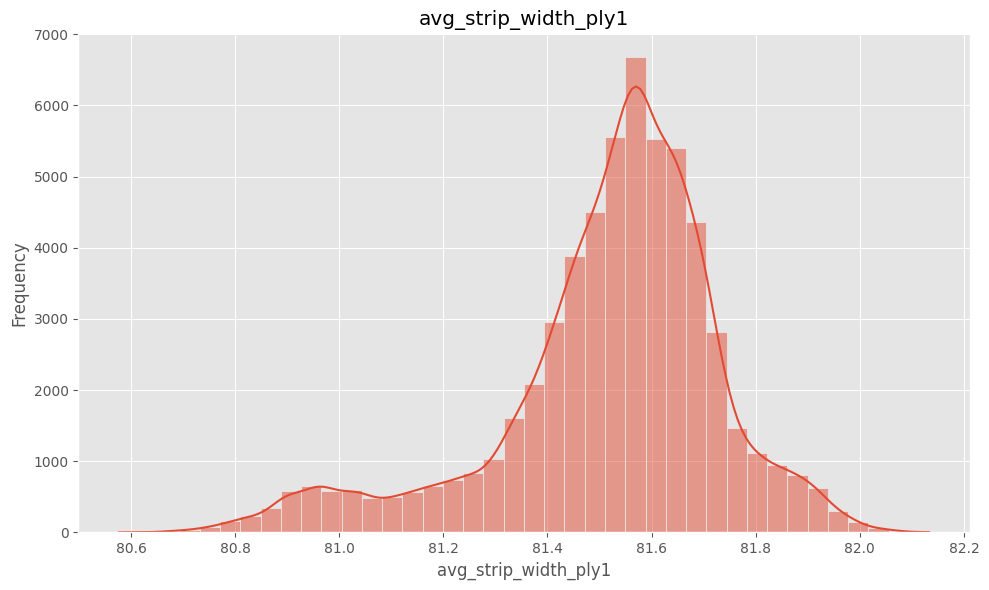

In [831]:
# Create a histogram for avg_strip_width using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['avg_strip_width_ply1']>=80.49]['avg_strip_width_ply1'], bins=40, kde=True)  # kde=True will add a kernel density estimate
plt.title('avg_strip_width_ply1')
plt.xlabel('avg_strip_width_ply1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

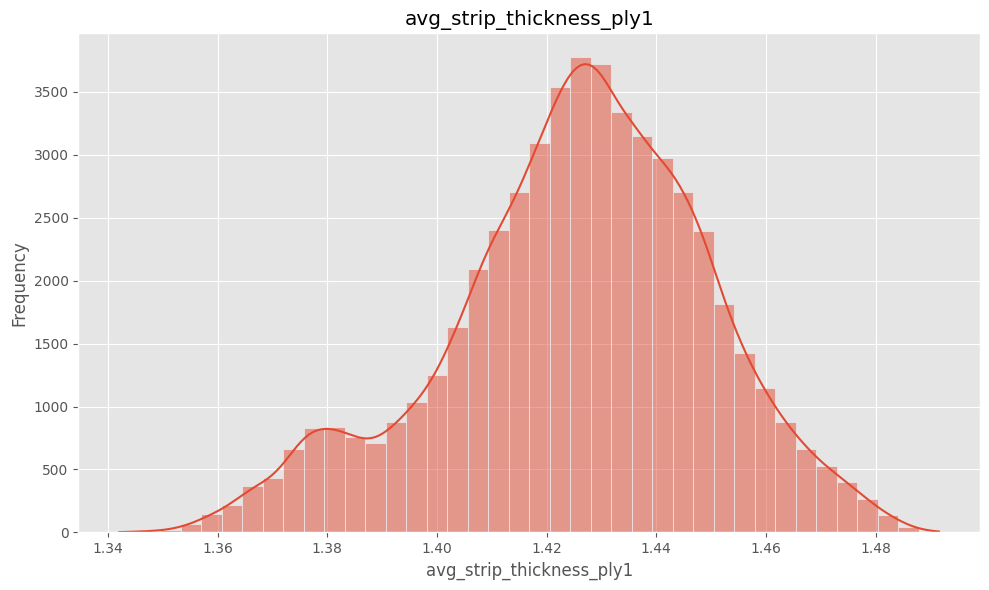

In [827]:
# Create a histogram for avg_strip_width using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['avg_strip_thickness_ply1']>=1.3]['avg_strip_thickness_ply1'], bins=40, kde=True)  # kde=True will add a kernel density estimate
plt.title('avg_strip_thickness_ply1')
plt.xlabel('avg_strip_thickness_ply1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [898]:
q1_25 = df1[(df1['build_dt'] >= '2025-01-01') & (df1['build_dt'] < '2025-04-01')]

q4_24 = df1[(df1['build_dt'] >= '2024-10-01') & (df1['build_dt'] <= '2024-12-31')]

In [900]:
q4_24.columns

Index(['barcode', 'build_dt', 'bt_car', 'cc_car', 'component_name_ply1',
       'component_name_ply2', 'defect_type', 'length_ply1', 'length_ply2',
       'spec_name', 'revision', 'dimensions', 'size', 'quality_rate',
       'defect_name', 'spec_angle_ply1', 'spec_angle_ply2', 'spec_length_ply1',
       'spec_length_ply2', 'TEAM_BUILD', 'width PLY 1', 'width PLY 2',
       'avg_gp_speed_ply1', 'avg_gp_speed_ply2', 'avg_p1_ply1', 'avg_p1_ply2',
       'avg_p2_ply1', 'avg_p2_ply2', 'avg_pulloff_speed_ply1',
       'avg_pulloff_speed_ply2', 'avg_screw_speed_ply1',
       'avg_screw_speed_ply2', 'avg_thickness_ply1', 'avg_thickness_ply2',
       'avg_width_ply1', 'avg_width_ply2'],
      dtype='object')

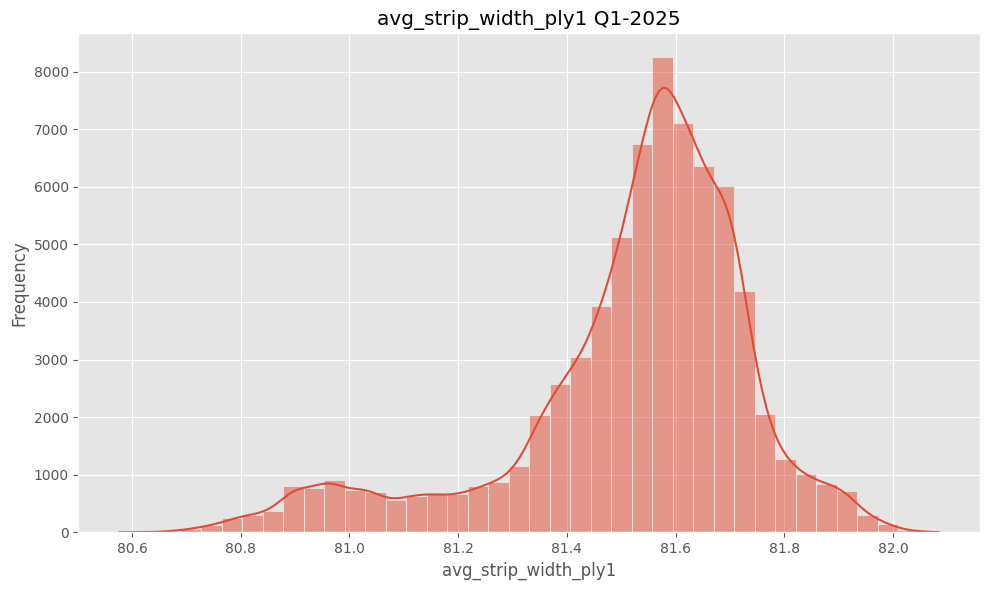

In [908]:
# Create a histogram for avg_strip_width using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(q1_25[q1_25['avg_width_ply1']>=80.49]['avg_width_ply1'], bins=40, kde=True)  # kde=True will add a kernel density estimate
plt.title('avg_strip_width_ply1 Q1-2025')
plt.xlabel('avg_strip_width_ply1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [857]:
q4_24['strip_10_thickness PLY1'] = pd.to_numeric(q4_24['strip_10_thickness PLY1'], errors='coerce')
q1_25['strip_10_thickness PLY1'] = pd.to_numeric(q1_25['strip_10_thickness PLY1'], errors='coerce')


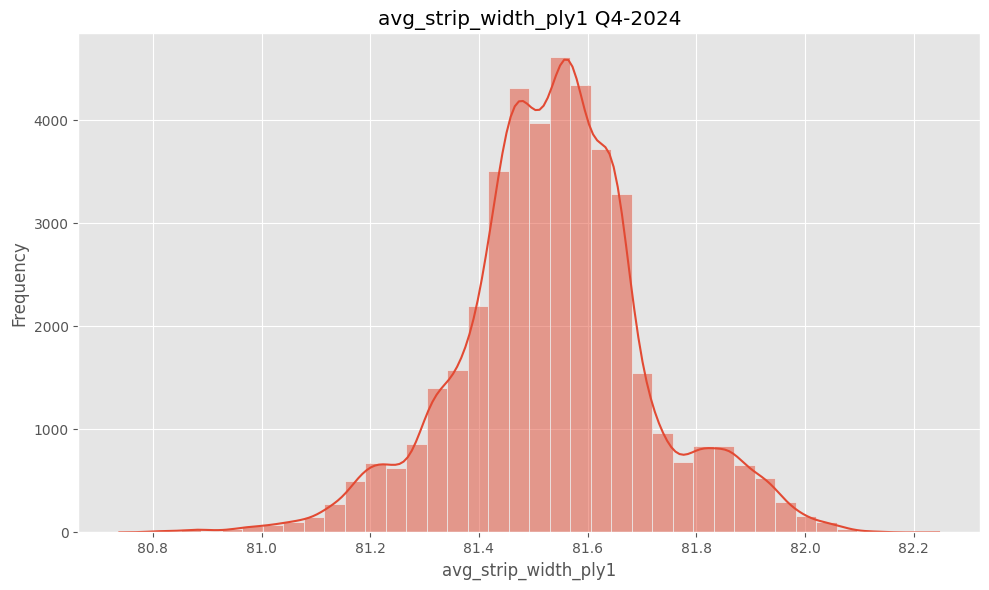

In [910]:
# Create a histogram for avg_strip_width using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(q4_24[q4_24['avg_width_ply1']>=80.4]['avg_width_ply1'], bins=40, kde=True)  # kde=True will add a kernel density estimate
plt.title('avg_strip_width_ply1 Q4-2024')
plt.xlabel('avg_strip_width_ply1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

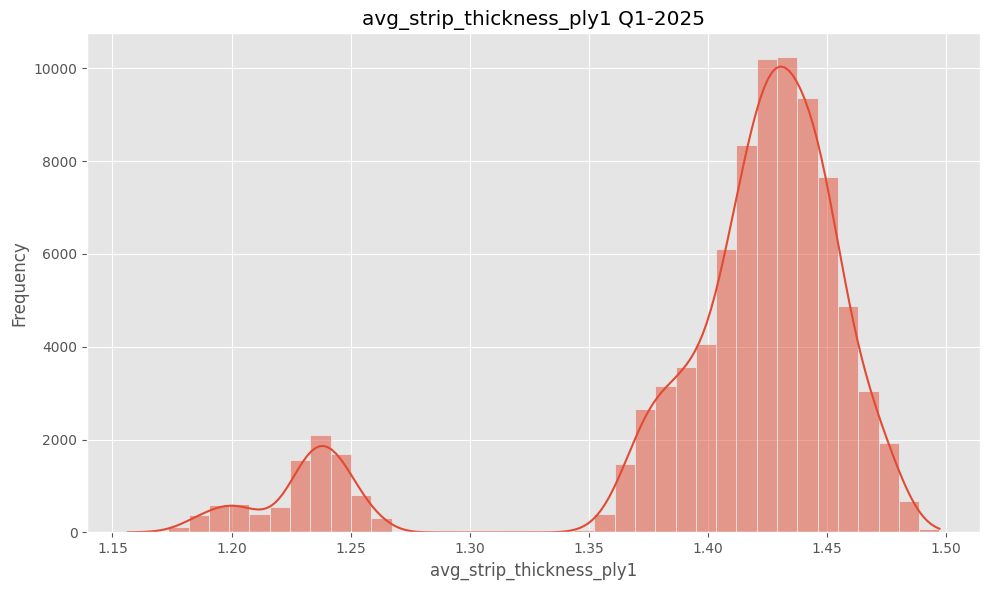

In [861]:
# Create a histogram for avg_strip_width using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(q1_25[q1_25['strip_10_thickness PLY1']>=1]['strip_10_thickness PLY1'], bins=40, kde=True)  # kde=True will add a kernel density estimate
plt.title('avg_strip_thickness_ply1 Q1-2025')
plt.xlabel('avg_strip_thickness_ply1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [104]:
df = df.query('not (size == 18 and length_ply1 < 1360 and length_ply1 > 1410)')
df = df.query('not (size == 22 and length_ply1 < 1700 and length_ply1 > 1700)')

In [109]:
df = df.query('not (size == 19 and length_ply1 > 1500)')

In [105]:
df = df.query('not (size == 20 and length_ply1 > 1575)')

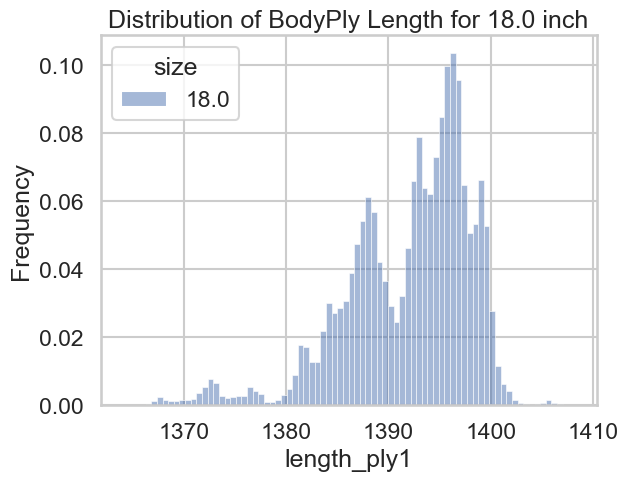

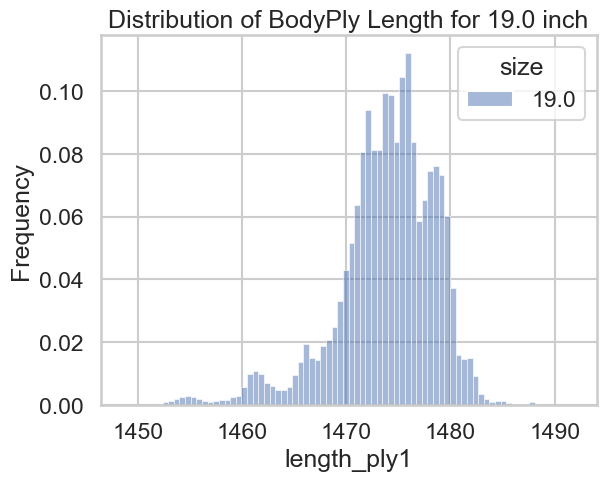

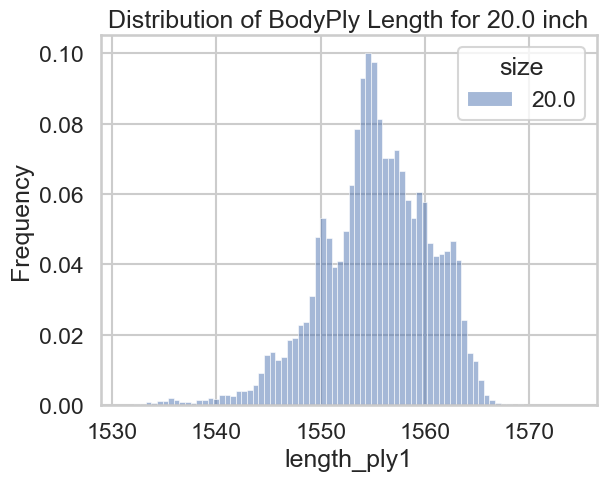

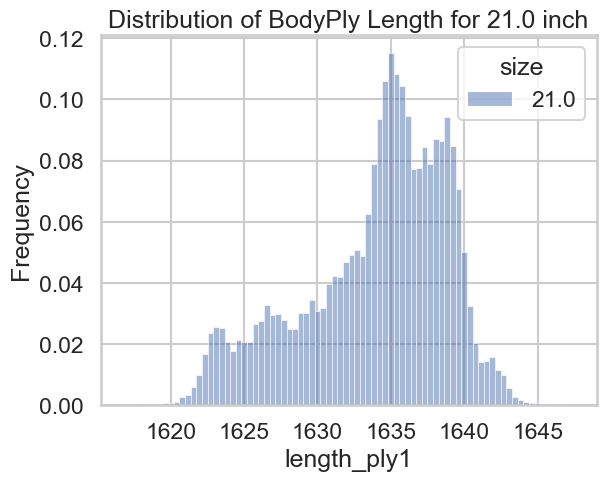

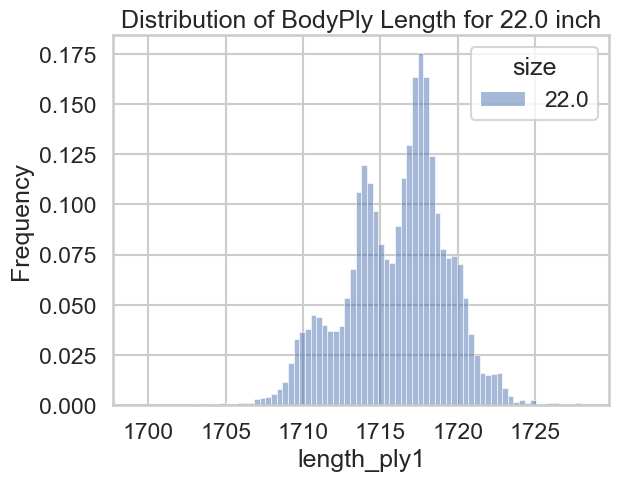

In [110]:
for size, group in df.groupby('size'):
    # group['length_ply1'].plot(kind='hist', bins=80, alpha=0.5, label=str(size), legend=True)
    sns.histplot(data=group, x='length_ply1', bins=80, hue='size', element='bars', stat='density', common_norm=False, palette='deep')
    plt.title(f"Distribution of BodyPly Length for {size} inch")
    plt.xlabel('length_ply1')
    plt.ylabel('Frequency')
    plt.show()


In [994]:
df_checkpoint = df2.copy()
df = df2.copy()

In [1116]:
df.columns

Index(['length_ply1', 'spec_name', 'size', 'quality_rate', 'defect_name',
       'spec_angle_ply1', 'spec_length_ply1', 'TEAM_BUILD', 'width PLY 1',
       'avg_gp_speed_ply1', 'avg_p1_ply1', 'avg_p2_ply1',
       'avg_pulloff_speed_ply1', 'avg_screw_speed_ply1',
       'avg_strip_thickness_ply1', 'avg_strip_width_ply1', 'date',
       'defect_percentage'],
      dtype='object')

In [1016]:
sns.regplot??


Signature:
sns.regplot(
    data=None,
    *,
    x=None,
    y=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-

In [1082]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [1076]:
colors = sns.color_palette('deep')

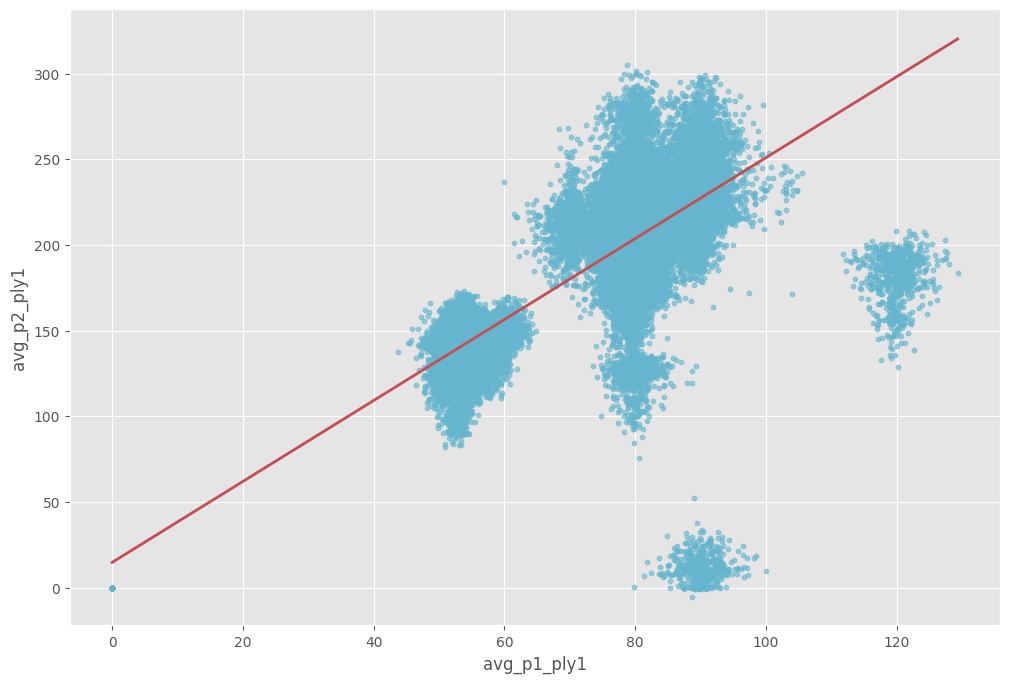

In [1086]:
plt.figure(figsize=(12,8))
sns.regplot(x='avg_p1_ply1', y='avg_p2_ply1', data=df, #marker='o',
            scatter_kws={'color':colors[9], 's':10, 'alpha':0.6},
           line_kws={'color':colors[3],'linewidth':2})
plt.show()

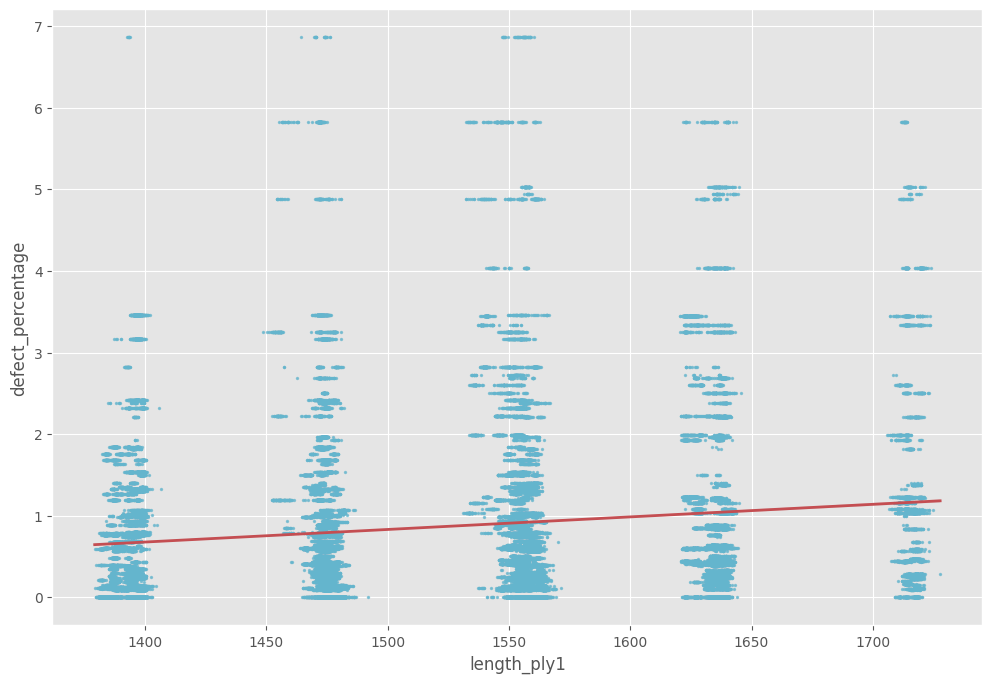

In [1094]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df, #marker='o',
            scatter_kws={'color':colors[9], 's':2, 'alpha':0.7},
           line_kws={'color':colors[3],'linewidth':2})
plt.show()

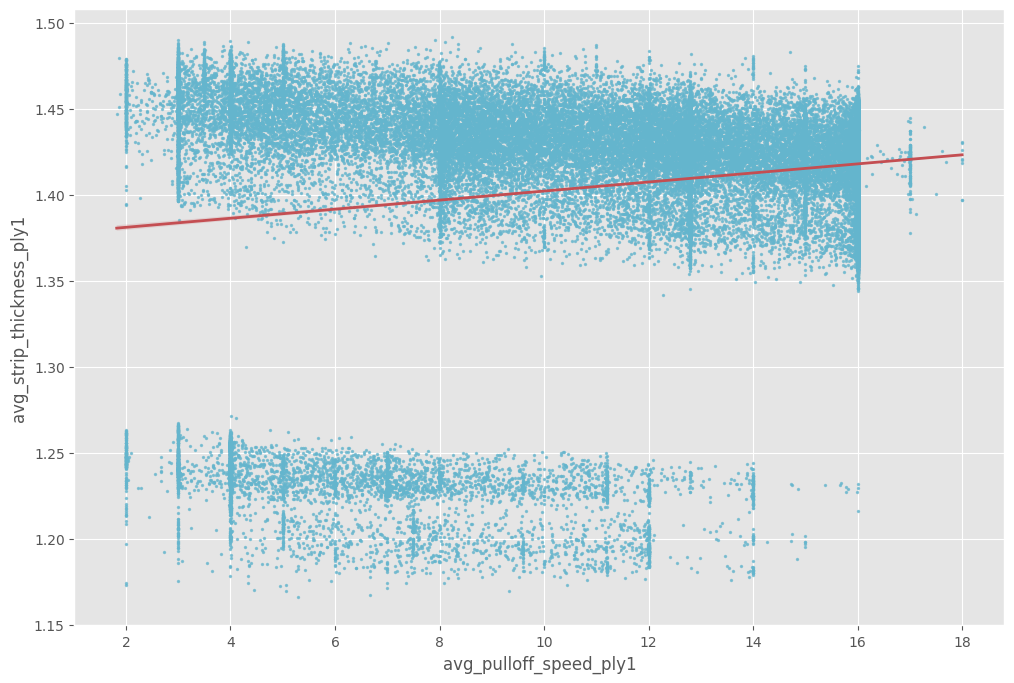

In [1110]:
plt.figure(figsize=(12,8))
sns.regplot(x='avg_pulloff_speed_ply1', y='avg_strip_thickness_ply1', data=df_temp, #marker='o',
            scatter_kws={'color':colors[9], 's':2, 'alpha':0.7},
           line_kws={'color':colors[3],'linewidth':2})
plt.show()

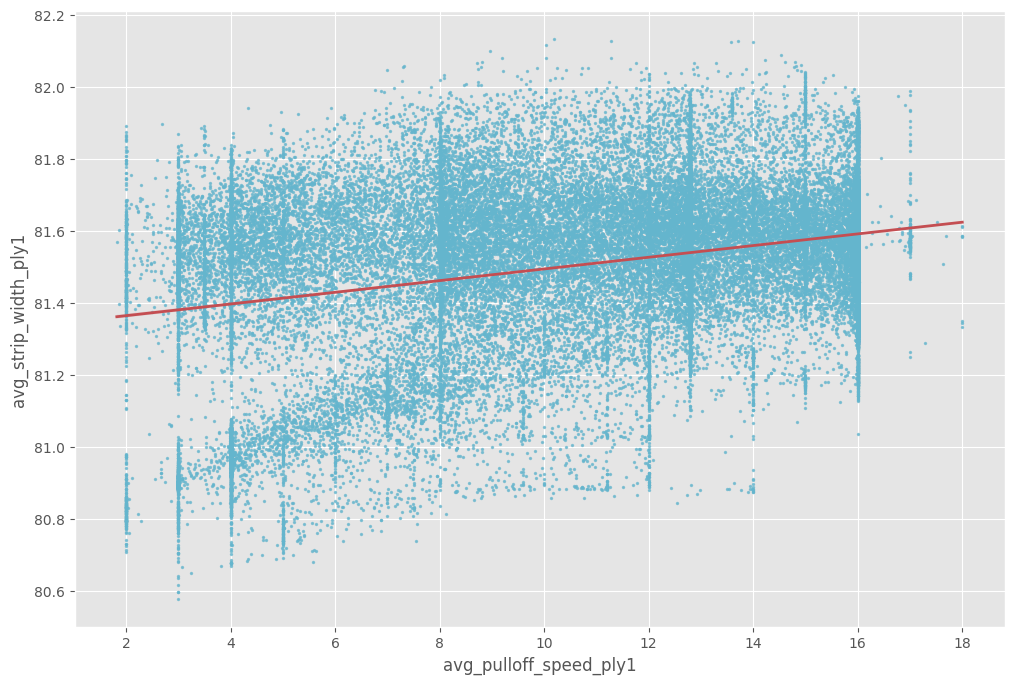

In [1104]:
plt.figure(figsize=(12,8))
sns.regplot(x='avg_pulloff_speed_ply1', y='avg_strip_width_ply1', data=df_temp, #marker='o',
            scatter_kws={'color':colors[9], 's':2, 'alpha':0.7},
           line_kws={'color':colors[3],'linewidth':2})
plt.show()

In [1102]:
df_temp = df.query('(avg_strip_width_ply1 >= 80.49)')

In [1108]:
df_temp = df.query('(avg_strip_thickness_ply1 > 1.1)')

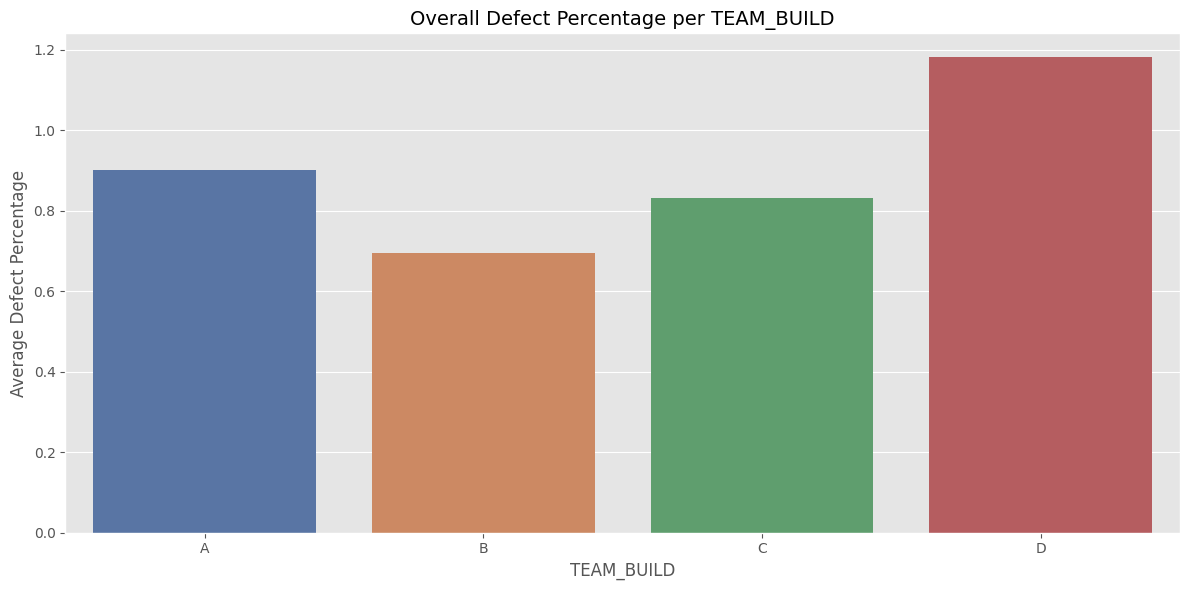

In [1112]:
# Assuming 'TEAM_BUILD' and 'defect_percentage' are columns in your DataFrame
plt.figure(figsize=(12, 6))

# Calculate overall defect percentage per TEAM_BUILD
team_defect_percentage = df.groupby('TEAM_BUILD')['defect_percentage'].mean().reset_index()

# Create a bar plot
sns.barplot(data=team_defect_percentage, x='TEAM_BUILD', y='defect_percentage', palette='deep')

# Set the title and labels
plt.title('Overall Defect Percentage per TEAM_BUILD', fontsize=14)
plt.xlabel('TEAM_BUILD')
plt.ylabel('Average Defect Percentage')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [117]:
df_18 = df.query('size == 18')
df_19 = df.query('size == 19')
df_20 = df.query('size == 20')
df_21 = df.query('size == 21')
df_22 = df.query('size == 22')

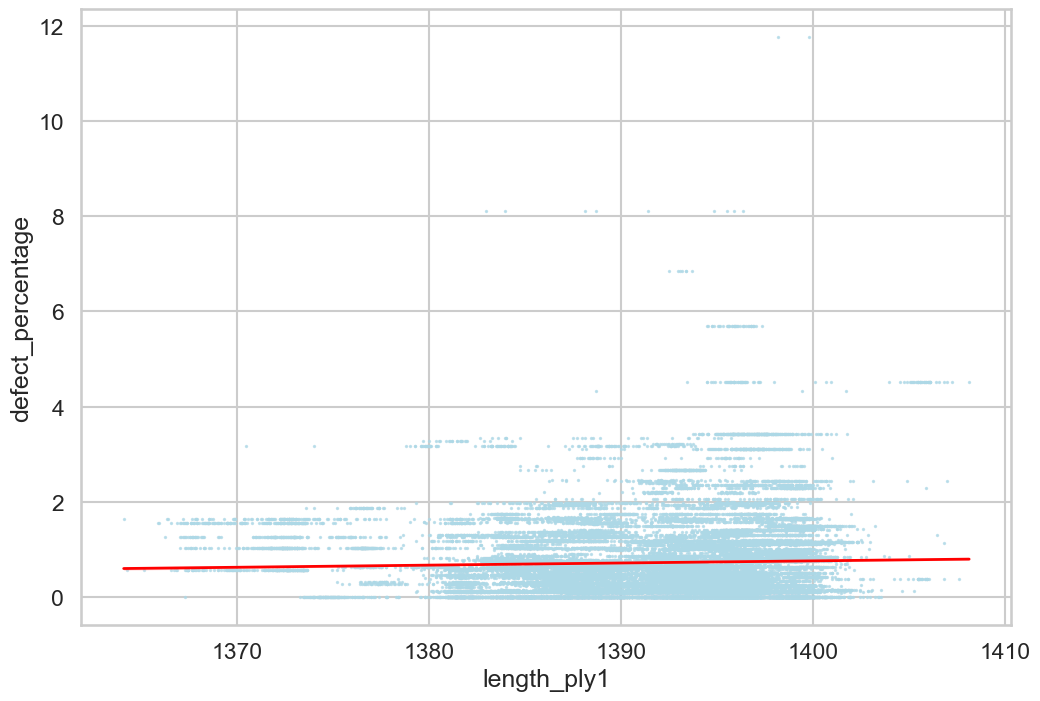

In [118]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df_18, #marker='o',
            scatter_kws={'color':'lightblue', 's':2, 'alpha':0.7},
           line_kws={'color':'red','linewidth':2})
plt.show()

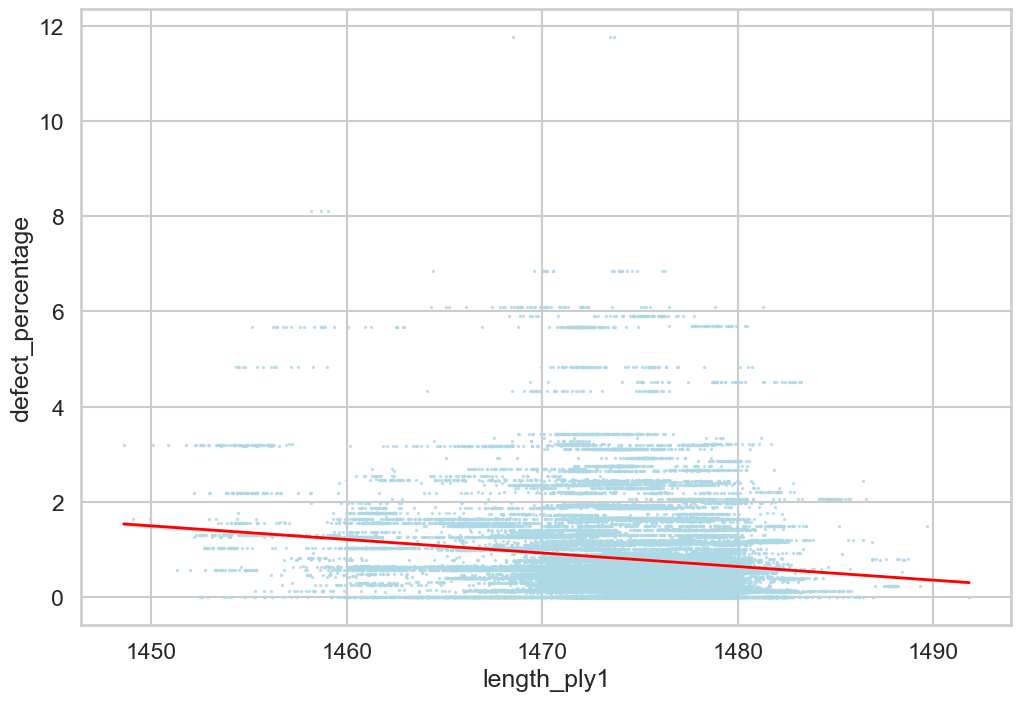

In [119]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df_19, #marker='o',
            scatter_kws={'color':'lightblue', 's':2, 'alpha':0.7},
           line_kws={'color':'red','linewidth':2})
plt.show()

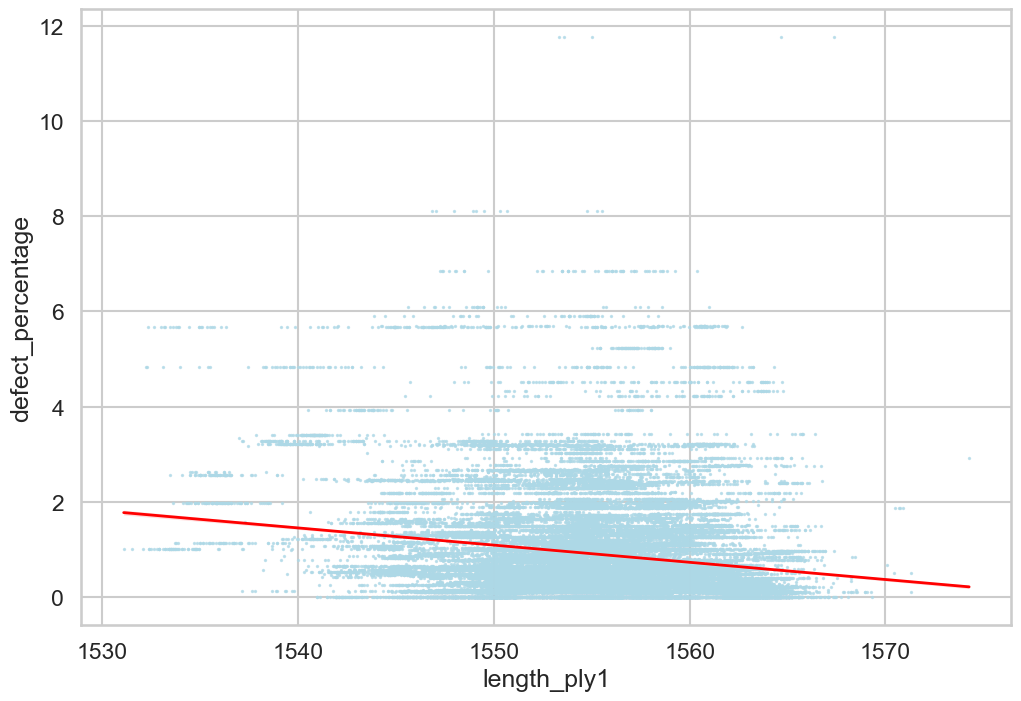

In [120]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df_20, #marker='o',
            scatter_kws={'color':'lightblue', 's':2, 'alpha':0.7},
           line_kws={'color':'red','linewidth':2})
plt.show()

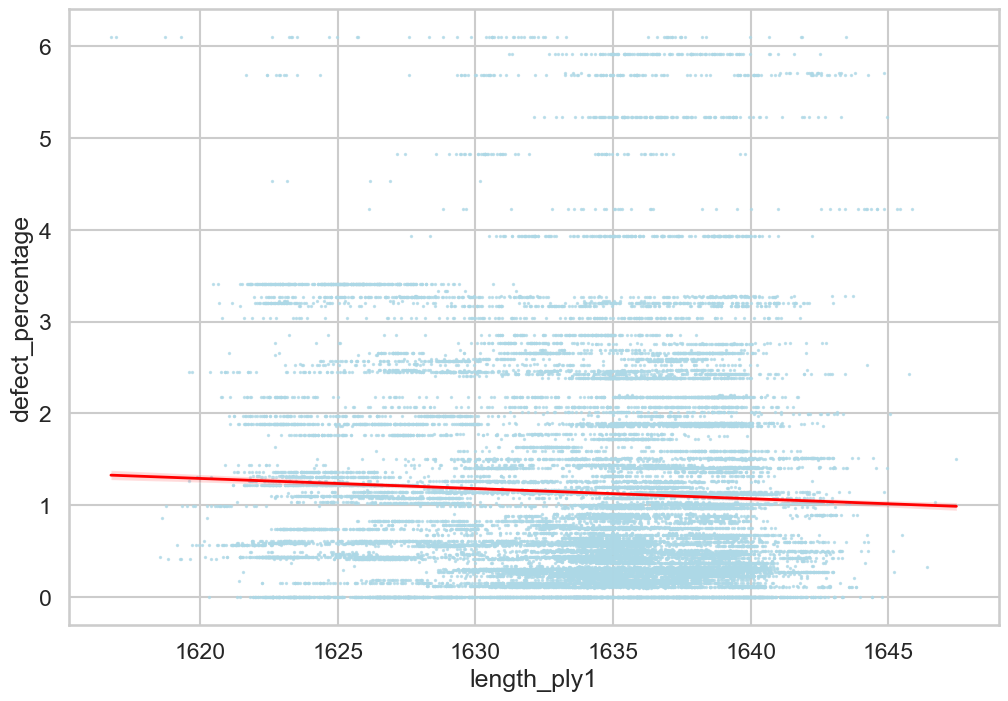

In [121]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df_21, #marker='o',
            scatter_kws={'color':'lightblue', 's':2, 'alpha':0.7},
           line_kws={'color':'red','linewidth':2})
plt.show()

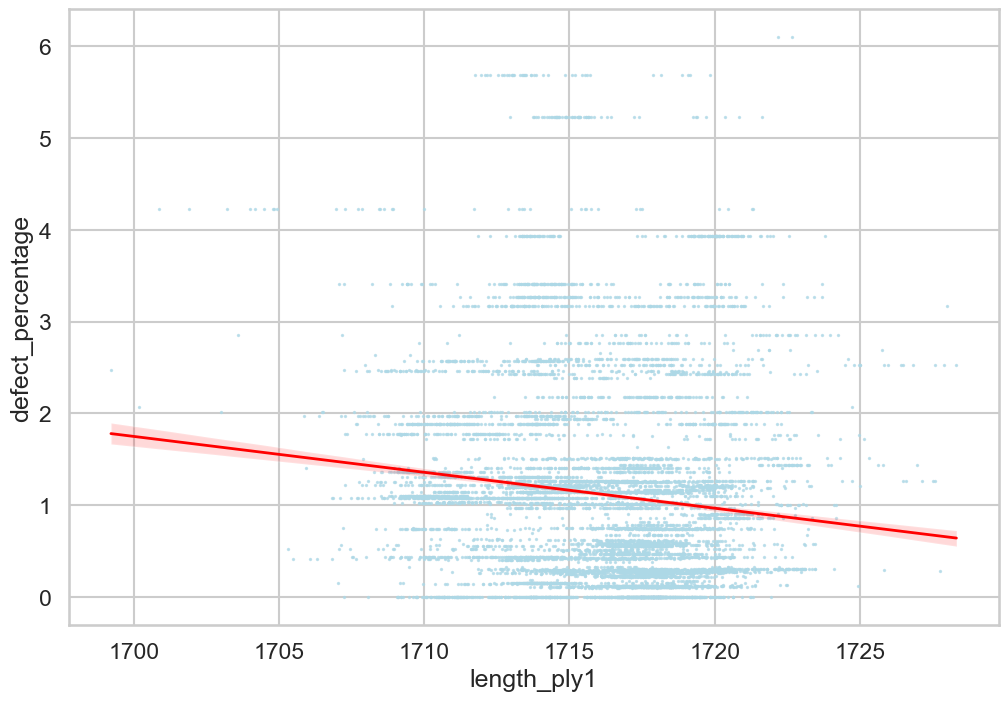

In [122]:
plt.figure(figsize=(12,8))
sns.regplot(x='length_ply1', y='defect_percentage', data=df_22, #marker='o',
            scatter_kws={'color':'lightblue', 's':2, 'alpha':0.7},
           line_kws={'color':'red','linewidth':2})
plt.show()

In [123]:
# Step 1: Group by size and length, compute average defect percentage
grouped = df.groupby(['size', 'length_ply1'])['defect_percentage'].mean().reset_index()

# Step 2: For each size, find the length_ply1 with the lowest defect percentage
best_lengths = grouped.loc[grouped.groupby('size')['defect_percentage'].idxmin()].reset_index(drop=True)


In [139]:
def find_common_low_defect(group):
    q1 = group['defect_percentage'].quantile(0.25)
    low_defect = group[group['defect_percentage'] <= q1]
    return low_defect['length_ply1'].mode().iloc[0]  # Most frequent value

common_lengths = df.groupby('size').apply(find_common_low_defect).reset_index(name='optimal_length')

In [140]:
common_lengths

size  optimal_length
0  18.0       1396.1553
1  19.0       1473.4629
2  20.0       1551.8293
3  21.0       1631.5771
4  22.0       1718.2013

In [135]:
min_max_ranges

size        min        max
0  18.0  1365.8623  1369.1809
1  19.0  1450.8534  1454.4792
2  20.0  1538.9805  1542.9413
3  21.0  1618.5281  1622.3237
4  22.0  1705.2958  1709.2291

In [151]:
df['length_ply1'] = df['length_ply1'].round()

In [162]:
weighted_grouped = df.groupby(['size', 'length_ply1']).agg(
    defect_percentage=('defect_percentage', 'mean'),
    tire_count=('defect_percentage', 'count')
).reset_index()

# Optionally: filter to lengths with at least a threshold count
weighted_grouped = weighted_grouped[weighted_grouped['tire_count'] > 1000]

In [163]:
min_max_lengths = weighted_grouped.groupby('size')['length_ply1'].agg(['min','max']).reset_index()
print(min_max_lengths)

   size     min     max
0  18.0  1386.0  1400.0
1  19.0  1469.0  1480.0
2  20.0  1548.0  1563.0
3  21.0  1631.0  1640.0
4  22.0  1714.0  1718.0


In [164]:
min_max_lengths

size     min     max
0  18.0  1386.0  1400.0
1  19.0  1469.0  1480.0
2  20.0  1548.0  1563.0
3  21.0  1631.0  1640.0
4  22.0  1714.0  1718.0

In [165]:
weighted_grouped

size  length_ply1  defect_percentage  tire_count
22   18.0       1386.0           0.587340        1132
23   18.0       1387.0           0.567456        1712
24   18.0       1388.0           0.642731        2076
25   18.0       1389.0           0.732817        1615
26   18.0       1390.0           0.684590        1118
28   18.0       1392.0           0.664684        1774
29   18.0       1393.0           0.722355        2659
30   18.0       1394.0           0.704599        2141
31   18.0       1395.0           0.658619        2813
32   18.0       1396.0           0.746355        3535
33   18.0       1397.0           0.787797        3006
34   18.0       1398.0           0.869036        1767
35   18.0       1399.0           0.816120        2189
36   18.0       1400.0           0.824114        1222
65   19.0       1469.0           0.913356        1028
66   19.0       1470.0           0.858420        1596
67   19.0       1471.0           0.888209        2371
68   19.0       1472.0           1.048271        3346
69   19.0       1473.0           0.852089        3002
70   19.0       1474.0           0.807900        3712
71   19.0       1475.0           0.780398        3404
72   19.0       1476.0           0.676673        3923
73   19.0       1477.0           0.685771        2352
74   19.0       1478.0           0.709564        2695
75   19.0       1479.0           0.694344        2762
76   19.0       1480.0           0.662423        1772
105  20.0       1548.0           0.936433        1008
106  20.0       1549.0           1.055781        1366
107  20.0       1550.0           0.980742        2469
108  20.0       1551.0           0.883396        2153
109  20.0       1552.0           0.966392        2062
110  20.0       1553.0           0.945016        3110
111  20.0       1554.0           0.898253        4363
112  20.0       1555.0           0.955667        4704
113  20.0       1556.0           0.899307        3602
114  20.0       1557.0           0.898609        3432
115  20.0       1558.0           0.873265        3034
116  20.0       1559.0           0.819050        2717
117  20.0       1560.0           0.847953        2702
118  20.0       1561.0           1.016673        2052
119  20.0       1562.0           0.606055        2127
120  20.0       1563.0           0.353299        2099
143  21.0       1631.0           1.032034        1048
144  21.0       1632.0           1.056739        1164
145  21.0       1633.0           0.967976        1311
146  21.0       1634.0           0.861637        2125
147  21.0       1635.0           1.044600        2827
148  21.0       1636.0           1.105194        2439
149  21.0       1637.0           1.253693        2039
150  21.0       1638.0           1.125438        2135
151  21.0       1639.0           1.190164        2230
152  21.0       1640.0           1.064820        1277
175  22.0       1714.0           1.387644        1127
178  22.0       1717.0           0.756196        1412
179  22.0       1718.0           0.732968        1509

In [156]:
# Step 3: For each size, get all lengths within ±2 mm of the best length
ranges = []

for _, row in best_lengths.iterrows():
    size = row['size']
    best_length = row['length_ply1']
    
    # Filter lengths within ±2 mm for this size
    in_range = grouped[
        (grouped['size'] == size) &
        (grouped['length_ply1'] >= best_length - 2) &
        (grouped['length_ply1'] <= best_length + 2)
    ]
    
    ranges.append(in_range)

# Combine all ranges into a single DataFrame
range_df = pd.concat(ranges).reset_index(drop=True)

In [157]:
min_max_ranges = range_df.groupby('size')['length_ply1'].agg(['min', 'max']).reset_index()

In [159]:
min_max_ranges

size        min        max
0  18.0  1365.8623  1369.1809
1  19.0  1450.8534  1454.4792
2  20.0  1538.9805  1542.9413
3  21.0  1618.5281  1622.3237
4  22.0  1705.2958  1709.2291

In [166]:
# Step 1: Find the minimum defect_percentage per size
min_defects = weighted_grouped.groupby('size')['defect_percentage'].min().reset_index()

# Step 2: Merge to get all rows matching that minimum defect_percentage
lowest_defects = pd.merge(weighted_grouped, min_defects, on=['size', 'defect_percentage'])

# Step 3: Get the mode length_ply1 per size
mode_lengths = lowest_defects.groupby('size')['length_ply1'].agg(lambda x: x.mode().iloc[0]).reset_index()

   size  length_ply1
0  18.0       1387.0
1  19.0       1480.0
2  20.0       1563.0
3  21.0       1634.0
4  22.0       1718.0


In [167]:
mode_lengths

size  length_ply1
0  18.0       1387.0
1  19.0       1480.0
2  20.0       1563.0
3  21.0       1634.0
4  22.0       1718.0

<Figure size 1200x600 with 0 Axes>

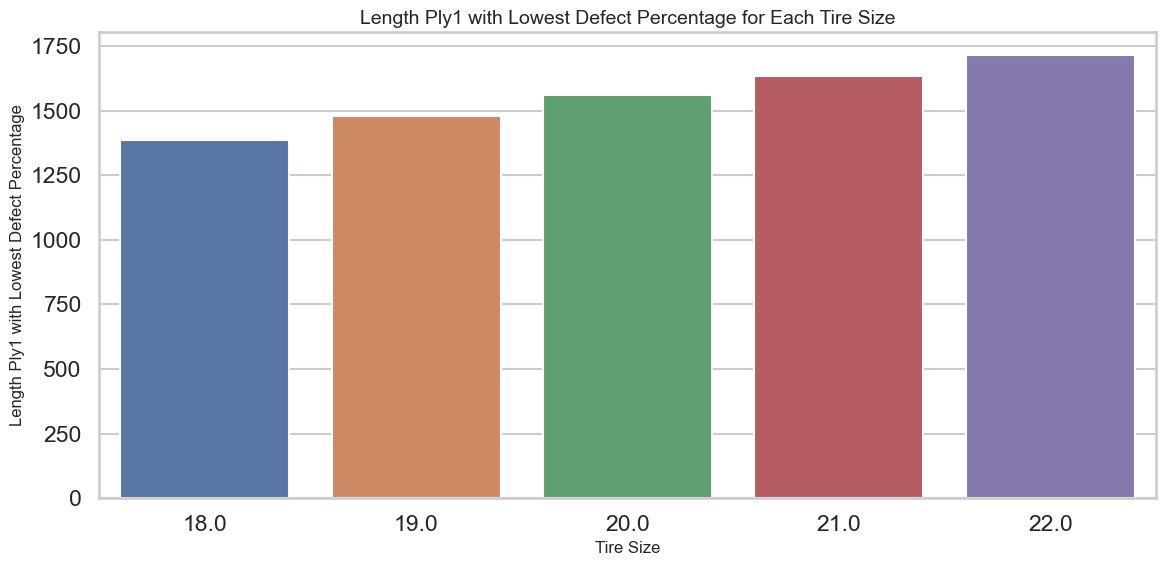

In [169]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mode_lengths, x='size', y='length_ply1', palette='deep')

# Step 2: Add titles and labels
plt.title('Length Ply1 with Lowest Defect Percentage for Each Tire Size', fontsize=14)
plt.xlabel('Tire Size', fontsize=12)
plt.ylabel('Length Ply1 with Lowest Defect Percentage', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()
plt.show()

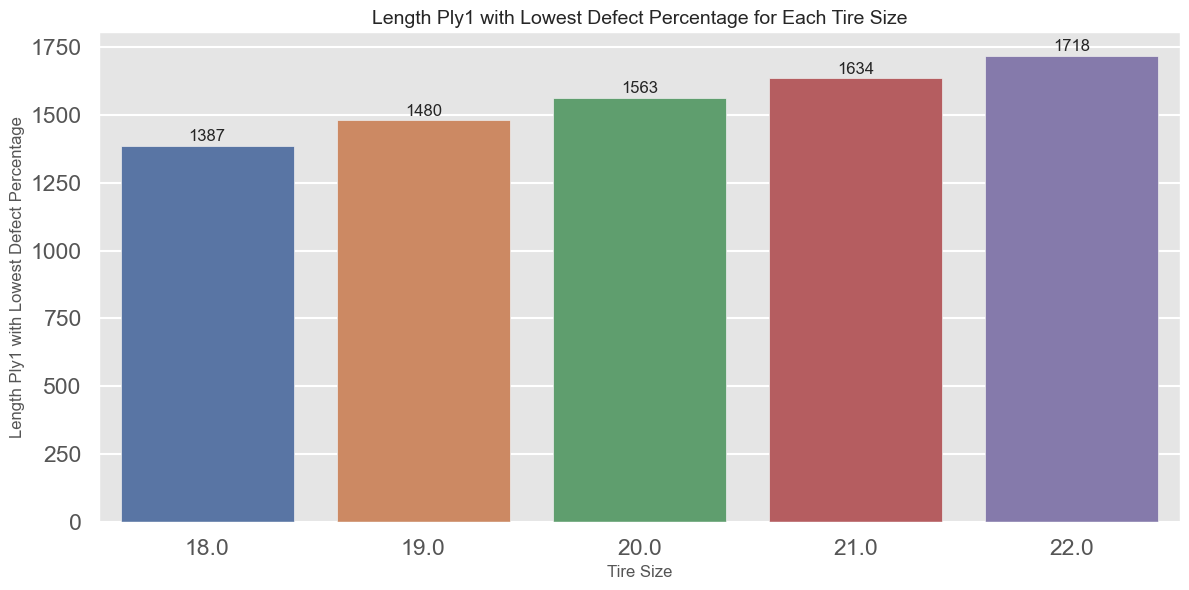

In [173]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mode_lengths, x='size', y='length_ply1', palette='deep')

# Step 2: Annotate each bar with the length value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.0f}', ha='center', va='bottom', fontsize=12)

# Step 3: Add titles and labels
plt.title('Length Ply1 with Lowest Defect Percentage for Each Tire Size', fontsize=14)
plt.xlabel('Tire Size', fontsize=12)
plt.ylabel('Length Ply1 with Lowest Defect Percentage', fontsize=12)

# Step 4: Show the plot
plt.tight_layout()
plt.show()
